# Import libraries

In [1]:
import warnings
# import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns

from cricket import Cricket

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

# Read Data Set

Group round = 1298135 - 1298146, 12 matches

Super 12 = 1298147 - 1298176, 27 matches (3 missing match: 1298155, 1298159, 1298160)

Semi Final = 1298177 - 1298178, 2 matches

Final = 1298179, 2 Match

In [2]:
df = pd.read_csv("T-20 World cup 2022.csv").set_index('match_id').drop(columns = ['comment_id', 'home_team', 'away_team'])

In [3]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 9814 entries, 1298179 to 1298135
Data columns (total 40 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   match_name         9814 non-null   object 
 1   current_innings    9814 non-null   object 
 2   innings_id         9814 non-null   int64  
 3   over               9814 non-null   int64  
 4   ball               9814 non-null   int64  
 5   runs               9814 non-null   int64  
 6   shortText          9814 non-null   object 
 7   isBoundary         9814 non-null   bool   
 8   isWide             9814 non-null   bool   
 9   isNoball           9814 non-null   bool   
 10  batsman1_id        9814 non-null   int64  
 11  batsman1_name      9814 non-null   object 
 12  batsman1_runs      9814 non-null   int64  
 13  batsman1_balls     9814 non-null   int64  
 14  bowler1_id         9814 non-null   int64  
 15  bowler1_name       9814 non-null   object 
 16  bowler1_overs      9

,match_name,current_innings,innings_id,over,ball,runs,shortText,isBoundary,isWide,isNoball,batsman1_id,batsman1_name,batsman1_runs,batsman1_balls,bowler1_id,bowler1_name,bowler1_overs,bowler1_maidens,bowler1_runs,bowler1_wkts,batsman2_id,batsman2_name,batsman2_runs,batsman2_balls,bowler2_id,bowler2_name,bowler2_overs,bowler2_maidens,bowler2_runs,bowler2_wkts,wicket_id,wkt_batsman_name,wkt_bowler_name,wkt_batsman_runs,wkt_batsman_balls,wkt_text,isRetiredHurt,text,preText,postText
match_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1298179,ENG v PAK,PAK,1,1,1,0,"Stokes to Mohammad Rizwan, no run",False,False,False,323389,Mohammad Rizwan,0,2,311158,Ben Stokes,0.1,0,2,0,348144,Babar Azam,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,"short again, and he gets some extra bounce on ...",NaN,NaN
1298179,ENG v PAK,PAK,1,1,1,1,"Stokes to Mohammad Rizwan, 1 wide",False,True,False,323389,Mohammad Rizwan,0,1,311158,Ben Stokes,0.0,0,2,0,348144,Babar Azam,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,and he'll have to bowl another free-hit after ...,<p>Free-hit</p>,NaN
1298179,ENG v PAK,PAK,1,1,1,1,"Stokes to Mohammad Rizwan, 1 no ball",False,False,True,323389,Mohammad Rizwan,0,1,311158,Ben Stokes,0.0,0,1,0,348144,Babar Azam,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,"full, and a hint of shape away from off stump....","<p><b>6.58pm</b> Thanks, Andrew M. The MCG is ...",NaN
1298179,ENG v PAK,PAK,1,1,2,2,"Stokes to Mohammad Rizwan, 2 runs",False,False,False,323389,Mohammad Rizwan,2,3,311158,Ben Stokes,0.2,0,4,0,348144,Babar Azam,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,"shortish, angling down leg, gloves a pull down...",NaN,NaN
1298179,ENG v PAK,PAK,1,1,3,0,"Stokes to Mohammad Rizwan, no run",False,False,False,323389,Mohammad Rizwan,2,4,311158,Ben Stokes,0.3,0,4,0,348144,Babar Azam,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,"length ball close to off stump, straightens a ...",NaN,NaN


## Functions for plots

In [4]:
# Lineplot

def lineplot(x, y, title = "", xlabel = "", ylabel = "", label = "", scatterplot = True, **kwargs):
    plt.plot(x, y, label = label, **kwargs)
    if scatterplot:
        plt.scatter(x, y)
    # plt.grid(axis= 'x')
    for i, v in zip(x, y):
        plt.text(i, v, str(v), ha='center', **kwargs)

    plt.title(title, **kwargs)
    plt.xlabel(xlabel, **kwargs)
    plt.ylabel(ylabel, **kwargs)
    plt.tight_layout();

In [5]:
# horizontal bar

def hbarplot(y, width, title = "", xlabel = "", ylabel = "", **kwargs):
    plt.barh(y = y, width = width)
    # plt.grid(axis = 'x')
    for i, v in zip(y, width):
        plt.text(v + 0.1, i, str(v), va='center')
    
    plt.title(title, **kwargs)
    plt.xlabel(xlabel, **kwargs)
    plt.ylabel(ylabel, **kwargs)
    plt.tight_layout();

In [6]:
# barplot

def barplot(x, height, title = "", xlabel = "", ylabel = "", **kwargs):
    plt.bar(x = x, height = height)
    # plt.grid(axis = 'x')
    for i, v in zip(x, height):
        plt.text(i, v + 0.1, str(v), ha='center')
    
    plt.title(title, **kwargs)
    plt.xlabel(xlabel, **kwargs)
    plt.ylabel(ylabel, **kwargs)
    plt.tight_layout();

In [7]:
# Pie chart

def pieplot(x, labels, autopct= '%1.1f%%', title = "", **kwargs):
    plt.pie(x = x, labels=labels, autopct=autopct, **kwargs)
    plt.title(title);

# Instantiate the _'Cricket'_ class

In [8]:
from cricket import Cricket
sup_12 = Cricket(df, 'super 12')
sup_12.info()

T20 World Cup: Super 12
Total Team in super 12 round: 12
Teams: ['INDIA' 'ZIM' 'BAN' 'PAK' 'NED' 'SA' 'SL' 'ENG' 'AUS' 'AFG' 'NZ' 'IRE']
Total Match in super 12 round: 27


## Run Timeline

### Run Timeline for all country

In [9]:
teams = ['INDIA', 'ZIM', 'BAN', 'PAK', 'NED', 'SA', 'SL', 'ENG', 'AUS', 'AFG', 'NZ', 'IRE']

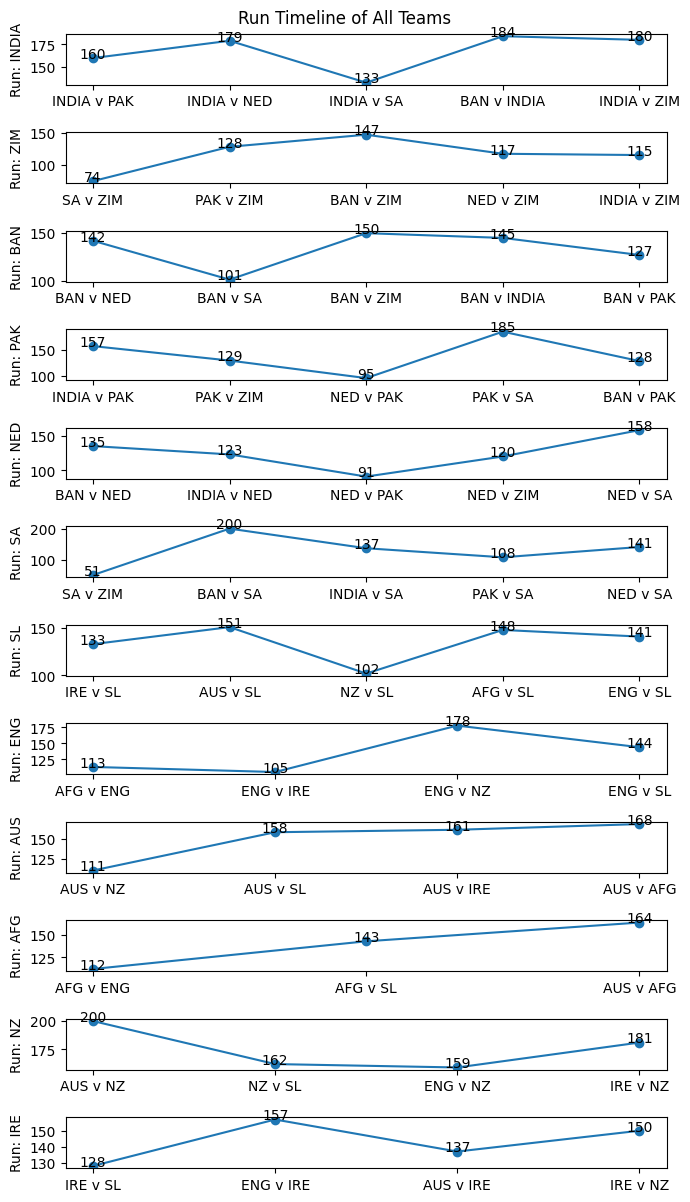

In [10]:
def team_run_timeline(team):
    timeline = sup_12.team_run_timeline(team)  
    lineplot(timeline['match_name'], timeline['Run'], ylabel = f'Run: {team}')



plt.figure(figsize=(7, 16))
for i, team in enumerate(teams):
    plt.subplot(16, 1, i+1)
    team_run_timeline(team)
    plt.suptitle('Run Timeline of All Teams')

### Analysis of Run in T20 world cup 2022

In [11]:
team_run = sup_12.team_run()
team_run

Run
match_id match_name  Team      
1298147  AUS v NZ    AUS    111
                     NZ     200
1298148  AFG v ENG   AFG    112
                     ENG    113
1298149  IRE v SL    IRE    128
                     SL     133
1298150  INDIA v PAK INDIA  160
                     PAK    157
1298151  BAN v NED   BAN    142
                     NED    135
1298152  SA v ZIM    SA      51
                     ZIM     74
1298153  AUS v SL    AUS    158
                     SL     151
1298154  ENG v IRE   ENG    105
                     IRE    157
1298156  BAN v SA    BAN    101
                     SA     200
1298157  INDIA v NED INDIA  179
                     NED    123
1298158  PAK v ZIM   PAK    129
                     ZIM    128
1298161  NZ v SL     NZ     162
                     SL     102
1298162  BAN v ZIM   BAN    150
                     ZIM    147
1298163  NED v PAK   NED     91
                     PAK     95
1298164  INDIA v SA  INDIA  133
                     SA     137
1298165  AUS v IRE   AUS    161
                     IRE    137
1298166  AFG v SL    AFG    143
                     SL     148
1298167  ENG v NZ    ENG    178
                     NZ     159
1298168  NED v ZIM   NED    120
                     ZIM    117
1298169  BAN v INDIA BAN    145
                     INDIA  184
1298170  PAK v SA    PAK    185
                     SA     108
1298171  IRE v NZ    IRE    150
                     NZ     181
1298172  AUS v AFG   AFG    164
                     AUS    168
1298173  ENG v SL    ENG    144
                     SL     141
1298174  NED v SA    NED    158
                     SA     141
1298175  BAN v PAK   BAN    127
                     PAK    128
1298176  INDIA v ZIM INDIA  180
                     ZIM    115

In [12]:
most_run_innings_player = sup_12.most_run_innings_player().head()
most_run_innings_player

,Match,Innings,Batsman,Balls,Runs,Strk rate
163,BAN v SA,SA,Rilee Rossouw,56,109,194.64
388,NZ v SL,NZ,Glenn Phillips,63,104,165.08
79,AUS v NZ,NZ,Devon Conway,58,92,158.62
257,INDIA v PAK,INDIA,Virat Kohli,53,82,154.72
207,ENG v NZ,ENG,Jos Buttler,47,73,155.32


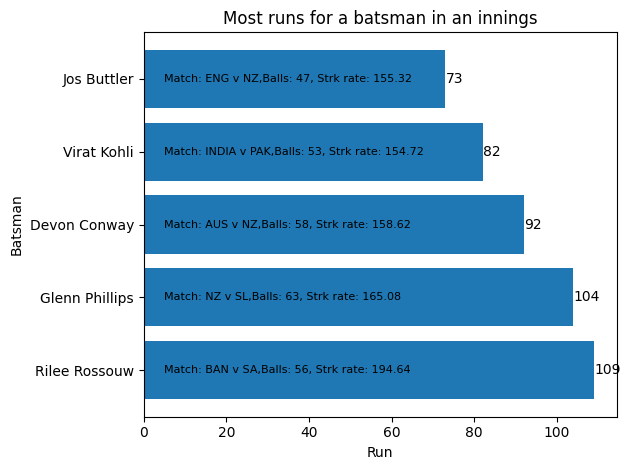

In [13]:
hbarplot(y = most_run_innings_player['Batsman'], width = most_run_innings_player['Runs'], title = 'Most runs for a batsman in an innings', xlabel = 'Run', ylabel = 'Batsman')
string = [f'Match: {m},Balls: {b}, Strk rate: {sr}' for m, b, sr in zip(most_run_innings_player['Match'], most_run_innings_player['Balls'], most_run_innings_player['Strk rate'])]

for i, v in zip(most_run_innings_player['Batsman'], string):
    plt.text(5, i, str(v), va = 'center', fontdict={'size': 8})

In [14]:
most_run_match_player = sup_12.most_run_match_player().head()
most_run_match_player

,Match,Balls,Runs,Batsman,Strk rate
0,BAN v SA,56,109,Rilee Rossouw,194.64
1,NZ v SL,63,104,Glenn Phillips,165.08
2,AUS v NZ,58,92,Devon Conway,158.62
3,INDIA v PAK,53,82,Virat Kohli,154.72
4,ENG v NZ,47,73,Jos Buttler,155.32


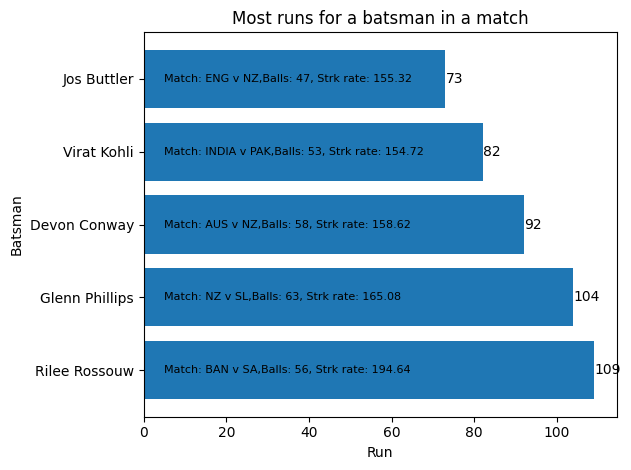

In [15]:
hbarplot(y = most_run_match_player['Batsman'], width = most_run_match_player['Runs'], title = 'Most runs for a batsman in a match', xlabel = 'Run', ylabel = 'Batsman')
string = [f'Match: {m},Balls: {b}, Strk rate: {sr}' for m, b, sr in zip(most_run_match_player['Match'], most_run_match_player['Balls'], most_run_match_player['Strk rate'])]

for i, v in zip(most_run_match_player['Batsman'], string):
    plt.text(5, i, str(v), va = 'center', fontdict={'size': 8})

In [16]:
most_run_team_player = sup_12.most_run_team_player().head()
most_run_team_player

,Team,Balls,Batsman,Runs,Strk rate
4,INDIA,177,Virat Kohli,246,138.98
7,NZ,118,Tim Southee,195,165.25
2,BAN,157,Yasir Ali,180,114.65
6,NED,127,Vikramjit Singh,148,116.54
9,SA,83,Wayne Parnell,141,169.88


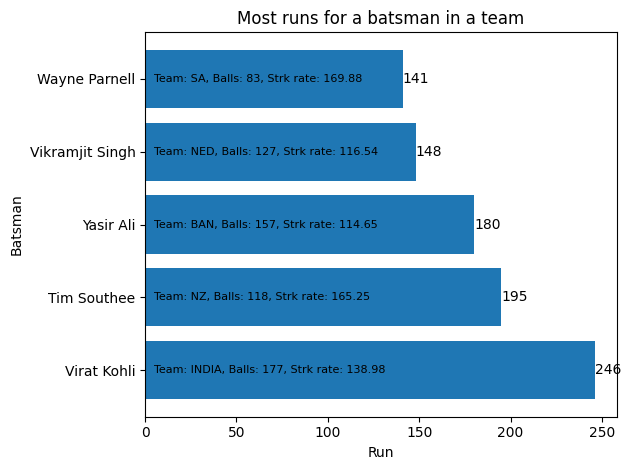

In [17]:
hbarplot(y = most_run_team_player['Batsman'], width = most_run_team_player['Runs'], title = 'Most runs for a batsman in a team', xlabel = 'Run', ylabel = 'Batsman')
string = [f'Team: {t}, Balls: {b}, Strk rate: {sr}' for t, b, sr in zip(most_run_team_player['Team'], most_run_team_player['Balls'], most_run_team_player['Strk rate'])]

for i, v in zip(most_run_team_player['Batsman'], string):
    plt.text(5, i, str(v), va = 'center', fontdict={'size': 8})

In [18]:
most_run_player = sup_12.most_run_player().head()
most_run_player

,Team,Batsman,Balls,Runs,Strk rate
61,INDIA,Virat Kohli,177,246,138.98
60,INDIA,Suryakumar Yadav,115,219,190.43
90,NZ,Glenn Phillips,118,195,165.25
33,BAN,Najmul Hossain Shanto,157,180,114.65
75,NED,Colin Ackermann,127,148,116.54


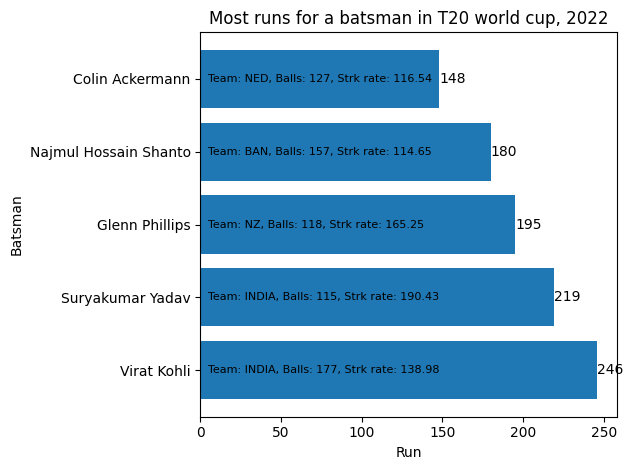

In [19]:
hbarplot(y = most_run_player['Batsman'], width = most_run_player['Runs'], title = 'Most runs for a batsman in T20 world cup, 2022', xlabel = 'Run', ylabel = 'Batsman')
string = [f'Team: {t}, Balls: {b}, Strk rate: {sr}' for t, b, sr in zip(most_run_player['Team'], most_run_player['Balls'], most_run_player['Strk rate'])]

for i, v in zip(most_run_player['Batsman'], string):
    plt.text(5, i, str(v), va = 'center', fontdict={'size': 8})

In [20]:
most_average_batsman = sup_12.most_average_batsman()
most_average_batsman = most_average_batsman[most_average_batsman['Runs'] >= 100].head()
most_average_batsman

,Batsman,Team,Runs,Strk rate,Match,Avg
0,Virat Kohli,INDIA,246,138.98,5,123.0
1,Suryakumar Yadav,INDIA,219,190.43,5,73.0
2,Glenn Phillips,NZ,195,165.25,4,65.0
10,Lorcan Tucker,IRE,128,128.00,4,64.0
23,Aaron Finch,AUS,107,110.31,3,53.5


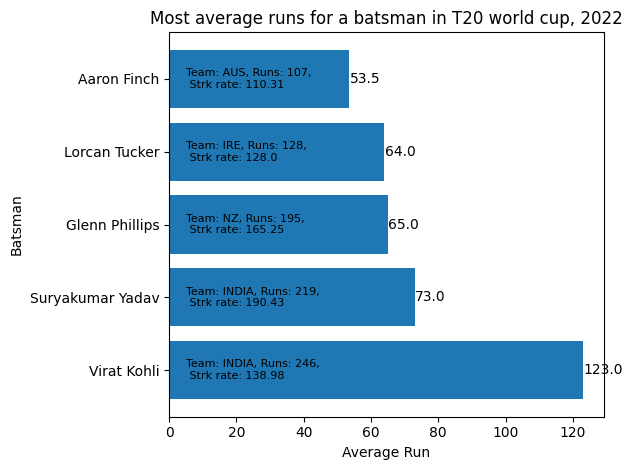

In [21]:
hbarplot(y = most_average_batsman['Batsman'], width = most_average_batsman['Avg'], title = 'Most average runs for a batsman in T20 world cup, 2022', xlabel = 'Average Run', ylabel = 'Batsman')
string = [f'Team: {t}, Runs: {r}, \n Strk rate: {b}' for t, r, b in zip(most_average_batsman['Team'], most_average_batsman['Runs'], most_average_batsman['Strk rate'])]

for i, v in zip(most_average_batsman['Batsman'], string):
    plt.text(5, i, str(v), va = 'center', fontdict={'size': 8})

### Analysis of bowling in T20 world cup, 2022

In [22]:
most_wicket_innings_bowler = sup_12.most_wicket_innings_bowler().head()
most_wicket_innings_bowler

,Match,Innings,Bowler,Wicket
3,AFG v ENG,AFG,Sam Curran,5
181,NZ v SL,SL,Trent Boult,4
182,PAK v SA,PAK,Anrich Nortje,4
62,BAN v PAK,BAN,Shaheen Shah Afridi,4
197,PAK v ZIM,ZIM,Mohammad Wasim,4


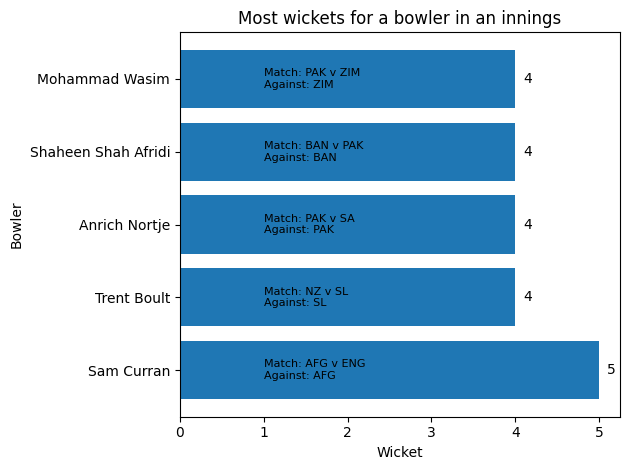

In [23]:
hbarplot(y = most_wicket_innings_bowler['Bowler'], width = most_wicket_innings_bowler['Wicket'], title = 'Most wickets for a bowler in an innings', xlabel = 'Wicket', ylabel = 'Bowler')
string = [f'Match: {m}\nAgainst: {i}' for m, i in zip(most_wicket_innings_bowler['Match'], most_wicket_innings_bowler['Innings'])]

for i, v in zip(most_wicket_innings_bowler['Bowler'], string):
    plt.text(1, i, str(v), va = 'center', fontdict={'size': 8})

In [24]:
most_wicket_match_bowler = sup_12.most_wicket_match_bowler().head()
most_wicket_match_bowler

,Match,Bowler,Wicket
0,AFG v ENG,Sam Curran,5
25,PAK v ZIM,Sikandar Raza,4
24,PAK v SA,Wayne Parnell,4
23,NZ v SL,Wanindu Hasaranga de Silva,4
7,BAN v NED,Tim Pringle,4


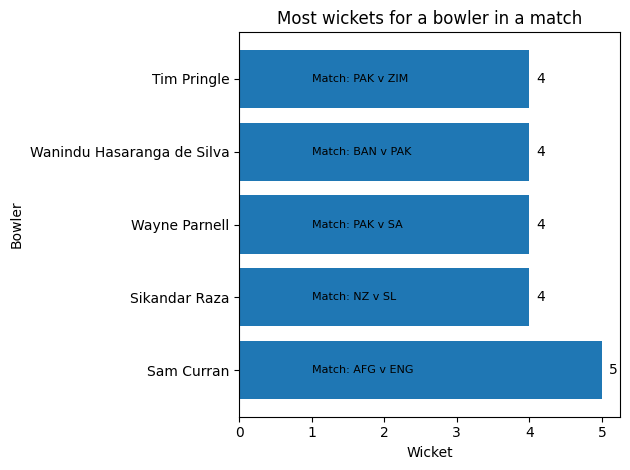

In [25]:
hbarplot(y = most_wicket_match_bowler['Bowler'], width = most_wicket_match_bowler['Wicket'], title = 'Most wickets for a bowler in a match', xlabel = 'Wicket', ylabel = 'Bowler')
string = [f'Match: {m}' for m in most_wicket_innings_bowler['Match']]

for i, v in zip(most_wicket_match_bowler['Bowler'], string):
    plt.text(1, i, str(v), va = 'center', fontdict={'size': 8})

In [26]:
most_wicket_bowler = sup_12.most_wicket_bowler().head()
most_wicket_bowler

,Bowler,Wicket
4,Anrich Nortje,11
65,Sam Curran,10
5,Arshdeep Singh,10
67,Shadab Khan,10
47,Mark Wood,9


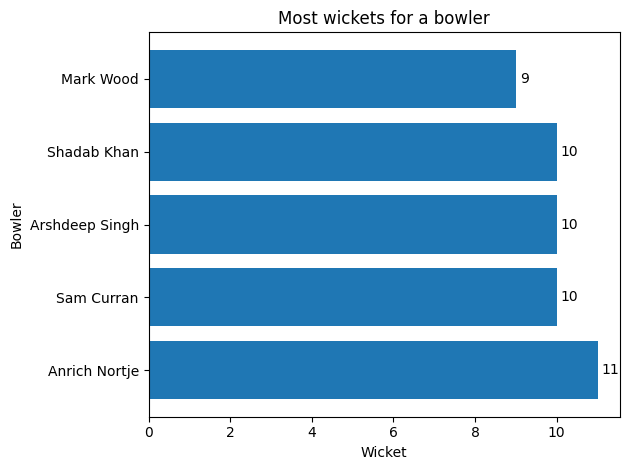

In [27]:
hbarplot(y = most_wicket_bowler['Bowler'], width = most_wicket_bowler['Wicket'], title = 'Most wickets for a bowler', xlabel = 'Wicket', ylabel = 'Bowler')

In [28]:
lowest_economy_bowler = sup_12.lowest_economy_bowler()
# Bowled minimum 12 overs
lowest_economy_bowler = lowest_economy_bowler[lowest_economy_bowler['Over'] >= 12].head()
lowest_economy_bowler

,Bowler,Over,Wickets,Economy
4,Anrich Nortje,17.3,11,5.43
66,Mustafizur Rahman,20.0,3,5.60
12,Bhuvneshwar Kumar,15.9,4,5.66
67,Naseem Shah,18.0,3,5.67
63,Mohammed Shami,17.0,6,6.12


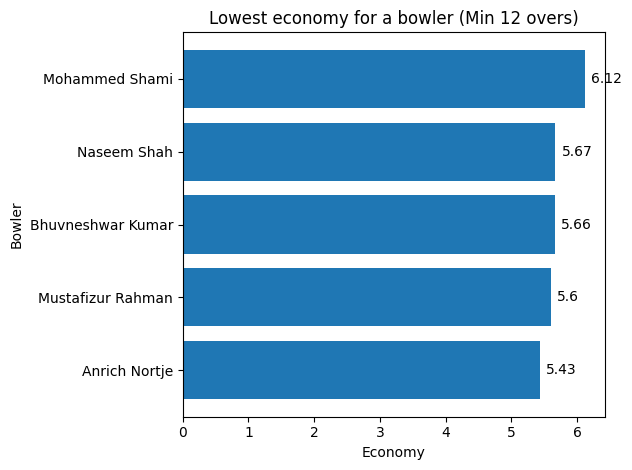

In [29]:
hbarplot(y = lowest_economy_bowler['Bowler'], width = lowest_economy_bowler['Economy'], title = 'Lowest economy for a bowler (Min 12 overs)', xlabel = 'Economy', ylabel = 'Bowler')

In [30]:
lowest_average_bowler = sup_12.lowest_average_bowler()
lowest_average_bowler = lowest_average_bowler[lowest_average_bowler['Over'] >= 12].head()
lowest_average_bowler

,Bowler,Over,Wickets,Average
4,Anrich Nortje,17.3,11,8.55
78,Sam Curran,14.4,10,9.40
80,Shadab Khan,18.0,10,11.20
54,Mark Wood,14.0,9,12.00
92,Tim Southee,14.1,7,12.86


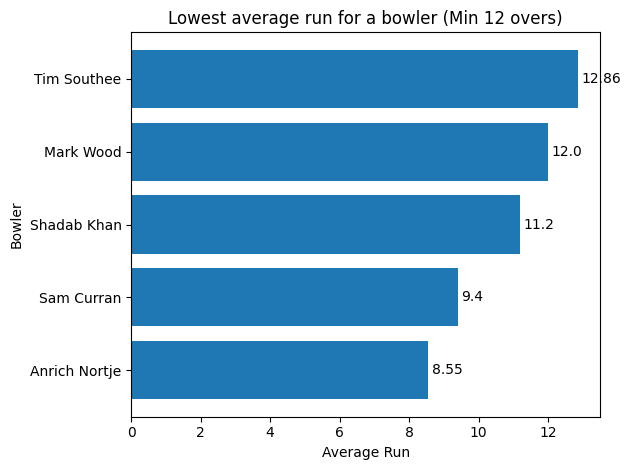

In [31]:
hbarplot(y = lowest_average_bowler['Bowler'], width = lowest_average_bowler['Average'], title = 'Lowest average run for a bowler (Min 12 overs)', xlabel = 'Average Run', ylabel = 'Bowler')

In [32]:
most_out_batsman = sup_12.most_out_batsman().head()
most_out_batsman

,Batsman,Out,Match
99,Sikandar Raza,5.0,5
74,Mohammad Rizwan,5.0,5
65,Max O'Dowd,5.0,5
91,Rohit Sharma,5.0,5
20,Craig Ervine,5.0,5


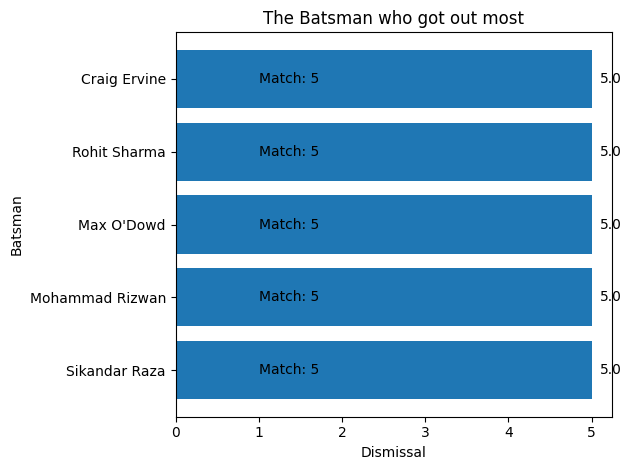

In [33]:
hbarplot(y = most_out_batsman['Batsman'], width = most_out_batsman['Out'], title = 'The Batsman who got out most', xlabel = 'Dismissal', ylabel = 'Batsman')
for i, v in zip(most_out_batsman['Batsman'], most_out_batsman['Match']):
    plt.text(1, i, f'Match: {str(v)}', va = 'center');

### Extra run analysis

who got most extra runs?

In [34]:
most_wide_run_innings_team = sup_12.most_wide_run_innings_team().head()
most_wide_run_innings_team

,Match,Team,Wide
6,AUS v IRE,AUS,12
22,ENG v IRE,ENG,10
1,AFG v ENG,ENG,7
37,IRE v NZ,NZ,7
44,NED v ZIM,ZIM,7


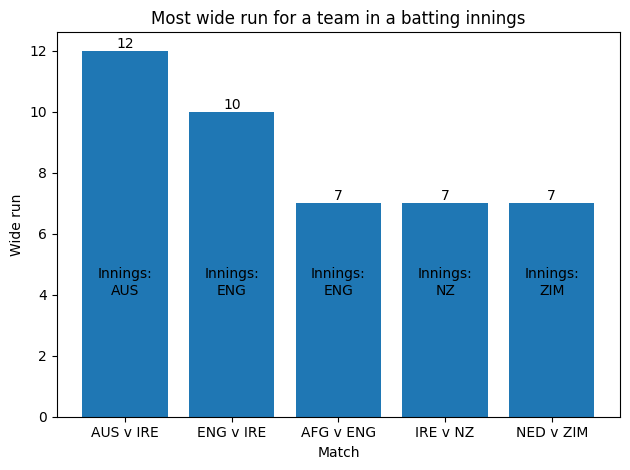

In [35]:
barplot(most_wide_run_innings_team['Match'], most_wide_run_innings_team['Wide'], 'Most wide run for a team in a batting innings', 'Match', 'Wide run')
for i, v in zip(most_wide_run_innings_team['Match'], most_wide_run_innings_team['Team']):
    plt.text(i, 4, f'Innings:\n{str(v)}', ha= 'center');

In [36]:
most_noball_run_innings_team = sup_12.most_noball_run_innings_team().head()
most_noball_run_innings_team

,Match,Team,NoBall
0,AFG v SL,AFG,1
1,AUS v IRE,IRE,1
16,PAK v SA,PAK,1
15,NZ v SL,NZ,1
14,NED v ZIM,NED,1


In [37]:
# barplot(most_noball_run_innings_team['Match'], most_noball_run_innings_team['NoBall'], 'Most NoBall run for a team in a batting innings', 'Match', 'NoBall run')
# for i, v in zip(most_noball_run_innings_team['Match'], most_noball_run_innings_team['Team']):
#     plt.text(i, 0.2, f'Innings:\n{str(v)}', ha= 'center');

### Most Played analysis

In [38]:
most_played_team = sup_12.most_played_team().head()
most_played_team

,Team,Matches,Match
2,BAN,"BAN v PAK, BAN v INDIA, BAN v ZIM, BAN v SA, B...",5
4,INDIA,"INDIA v ZIM, BAN v INDIA, INDIA v SA, INDIA v ...",5
6,NED,"NED v SA, NED v ZIM, NED v PAK, INDIA v NED, B...",5
8,PAK,"BAN v PAK, PAK v SA, NED v PAK, PAK v ZIM, IND...",5
9,SA,"NED v SA, PAK v SA, INDIA v SA, BAN v SA, SA v...",5


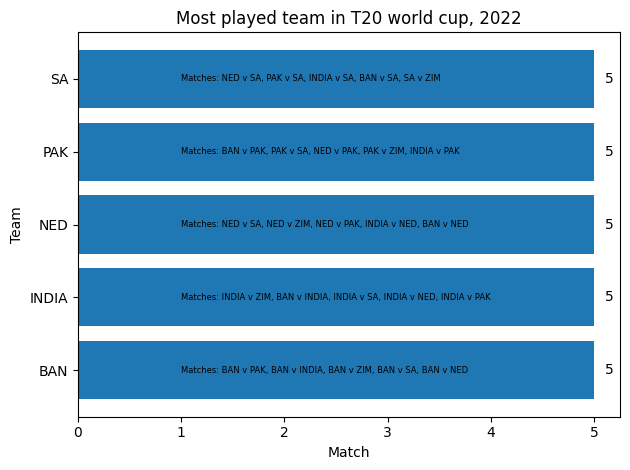

In [39]:
hbarplot(y = most_played_team['Team'], width = most_played_team['Match'], title = 'Most played team in T20 world cup, 2022', xlabel = 'Match', ylabel = 'Team')
string = [f'Matches: {m}' for m in most_played_team['Matches']]

for i, v in zip(most_played_team['Team'], string):
    plt.text(1, i, str(v), va = 'center', fontdict={'size': 6})

In [40]:
most_played_batsman = sup_12.most_played_batsman().head()
most_played_batsman

,Batsman,Matches,Match
129,Suryakumar Yadav,"INDIA v ZIM, BAN v INDIA, INDIA v SA, INDIA v ...",5
132,Temba Bavuma,"NED v SA, PAK v SA, INDIA v SA, BAN v SA, SA v...",5
21,Charith Asalanka,"ENG v SL, AFG v SL, NZ v SL, AUS v SL, IRE v SL",5
23,Colin Ackermann,"NED v SA, NED v ZIM, NED v PAK, INDIA v NED, B...",5
24,Craig Ervine,"INDIA v ZIM, NED v ZIM, BAN v ZIM, PAK v ZIM, ...",5


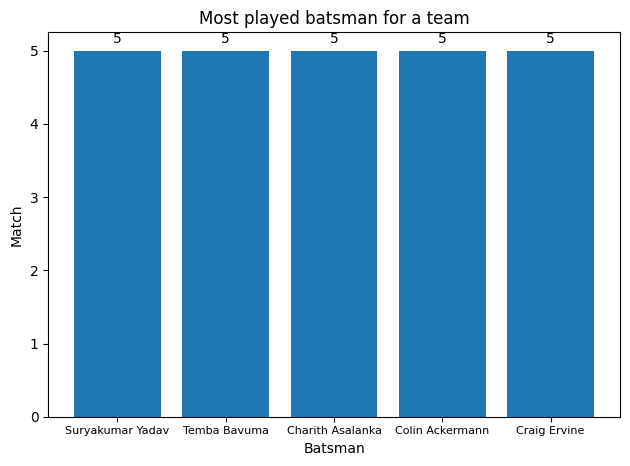

In [41]:
barplot(most_played_batsman['Batsman'], most_played_batsman['Match'], 'Most played batsman for a team', 'Batsman', 'Match')
plt.xticks(fontsize = 8);

In [42]:
most_played_bowler = sup_12.most_played_bowler().head()
most_played_bowler

,Bowler,Matches,Match
34,Hardik Pandya,"INDIA v ZIM, BAN v INDIA, INDIA v SA, INDIA v ...",5
45,Lahiru Kumara,"ENG v SL, AFG v SL, NZ v SL, AUS v SL, IRE v SL",5
24,Dhananjaya de Silva,"ENG v SL, AFG v SL, NZ v SL, AUS v SL, IRE v SL",5
81,Shaheen Shah Afridi,"BAN v PAK, PAK v SA, NED v PAK, PAK v ZIM, IND...",5
80,Shadab Khan,"BAN v PAK, PAK v SA, NED v PAK, PAK v ZIM, IND...",5


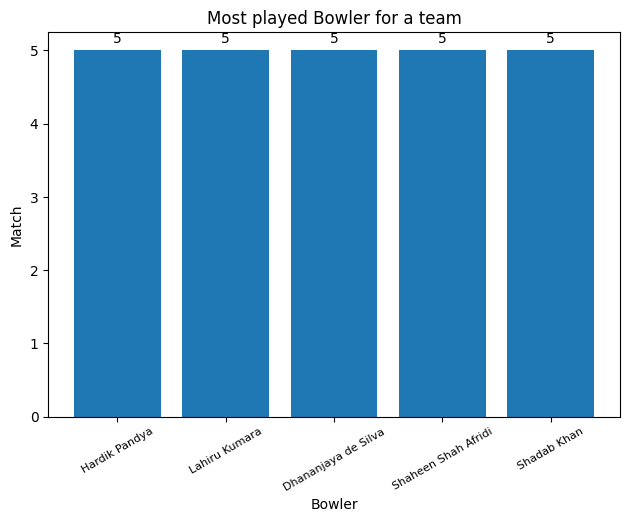

In [43]:
barplot(most_played_bowler['Bowler'], most_played_bowler['Match'], 'Most played Bowler for a team', 'Bowler', 'Match')
plt.xticks(rotation = 30, fontsize = 8);

### Most Winning Teams

In [44]:
most_winning_team = sup_12.most_winning_team()
most_winning_team

,Team,Wins
0,INDIA,4
1,PAK,4
2,NZ,3
3,ENG,3
4,AUS,3
5,SL,2
6,BAN,2
7,SA,2
8,NED,2
9,ZIM,1


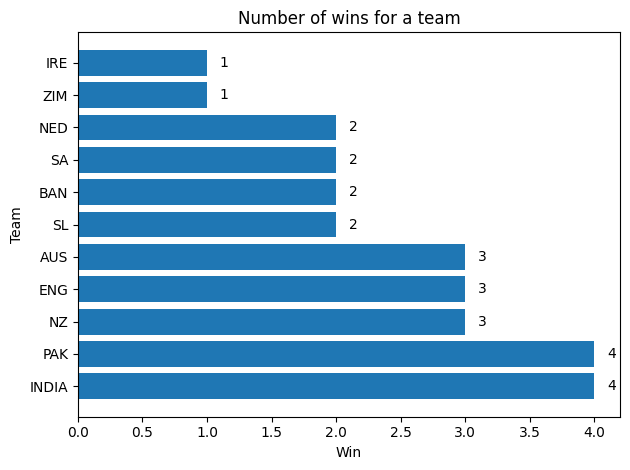

In [45]:
hbarplot(y = most_winning_team['Team'], width = most_winning_team['Wins'], title = 'Number of wins for a team', xlabel = 'Win', ylabel = 'Team')

### Who wins the most? Before batting or after batting?

In [46]:
most_winning_innings = sup_12.most_winning_innings()
most_winning_innings

,Innings_No.,Wins,win %
0,1,16,59.26
1,2,11,40.74


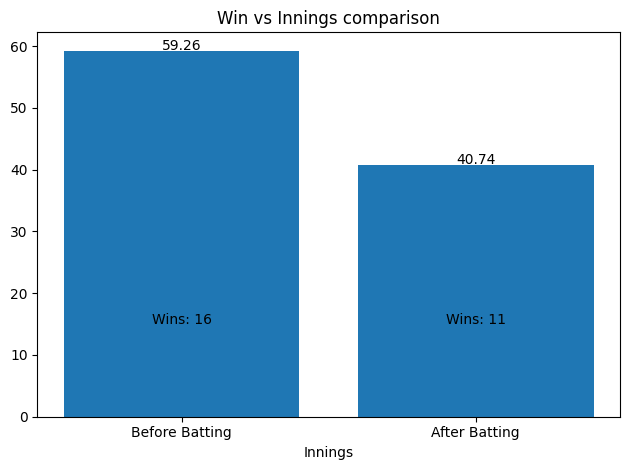

In [47]:
barplot(x = most_winning_innings['Innings_No.'], height = most_winning_innings['win %'], title = 'Win vs Innings comparison', xlabel = 'Innings')
plt.xticks(most_winning_innings['Innings_No.'], ['Before Batting', 'After Batting'])
for i, v in zip(most_winning_innings['Innings_No.'], most_winning_innings['Wins']):
    plt.text(i, 15, f'Wins: {str(v)}', ha = 'center');

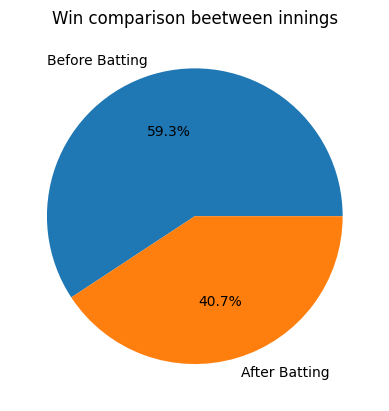

In [48]:
pieplot(most_winning_innings['Wins'], labels=['Before Batting', 'After Batting'], title= 'Win comparison beetween innings')

In [49]:
most_win_match_ratio = sup_12.most_win_match_ratio().head()
most_win_match_ratio

,Team,Match,Wins,Ratio %
1,INDIA,5,4.0,80.0
3,PAK,5,4.0,80.0
7,AUS,4,3.0,75.0
8,ENG,4,3.0,75.0
10,NZ,4,3.0,75.0


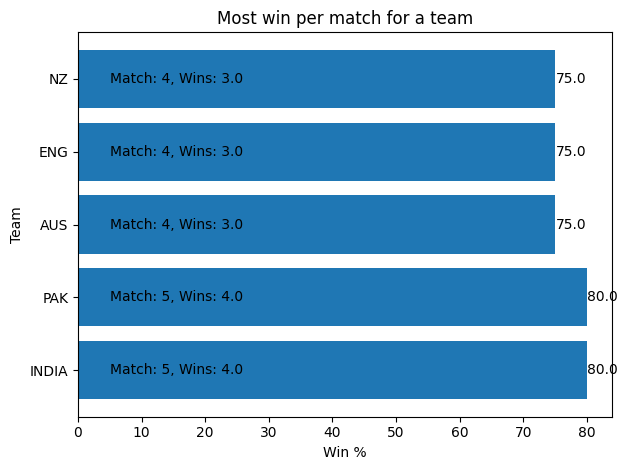

In [50]:
hbarplot(y = most_win_match_ratio['Team'], width = most_win_match_ratio['Ratio %'], title = 'Most win per match for a team', xlabel = 'Win %', ylabel = 'Team')
string = [f'Match: {m}, Wins: {w}' for m, w in zip(most_win_match_ratio['Match'], most_win_match_ratio['Wins'])]

for i, v in zip(most_win_match_ratio['Team'], string):
    plt.text(5, i, str(v), va = 'center', fontdict={'size': 10})

### Most Fours

In [51]:
most_fours_innings = sup_12.most_fours_innings().head()
most_fours_innings

,match_name,Innings,Fours
13,BAN v INDIA,INDIA,18
37,IRE v NZ,NZ,16
5,AUS v AFG,AUS,16
9,AUS v NZ,NZ,15
42,NED v SA,NED,15


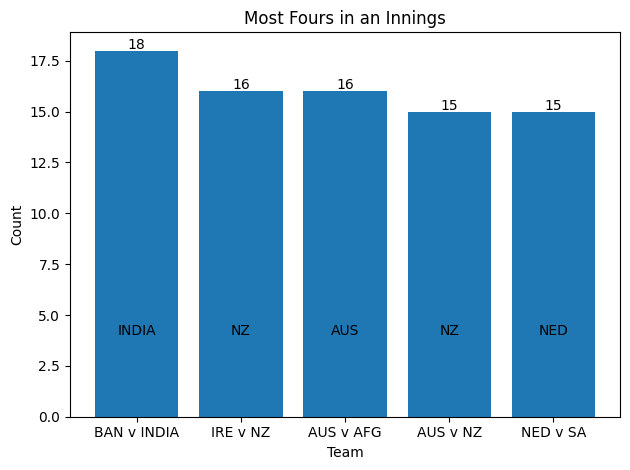

In [52]:
# most_fours_innings = most_fours_innings.head(5)

barplot(most_fours_innings['match_name'], most_fours_innings['Fours'], 'Most Fours in an Innings', 'Team', 'Count')
for i, v in zip(most_fours_innings['match_name'], most_fours_innings['Innings']):
    plt.text(i, 4, str(v), ha = 'center');

In [53]:
most_fours_team = sup_12.most_fours_team().head()
most_fours_team

,Team,Fours
4,INDIA,66
6,NED,54
9,SA,54
8,PAK,51
10,SL,51


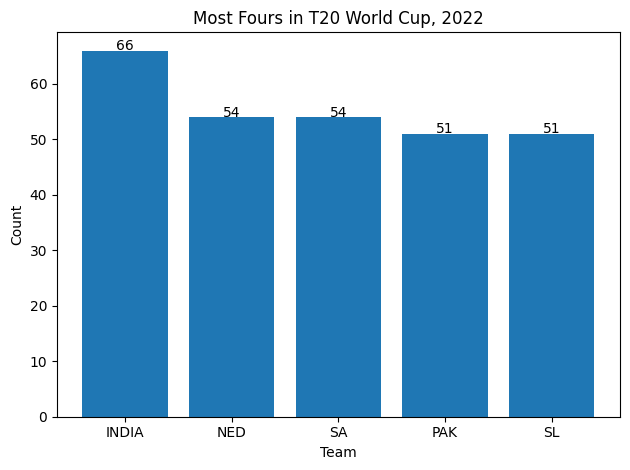

In [54]:
# most_fours_team = most_fours_team.head(5)
barplot(most_fours_team['Team'], most_fours_team['Fours'], 'Most Fours in T20 World Cup, 2022', 'Team', 'Count')

In [55]:
most_fours_match = sup_12.most_fours_match().head()
most_fours_match

,Match,Fours
6,BAN v INDIA,31
2,AUS v AFG,27
17,INDIA v ZIM,27
10,BAN v ZIM,26
18,IRE v NZ,26


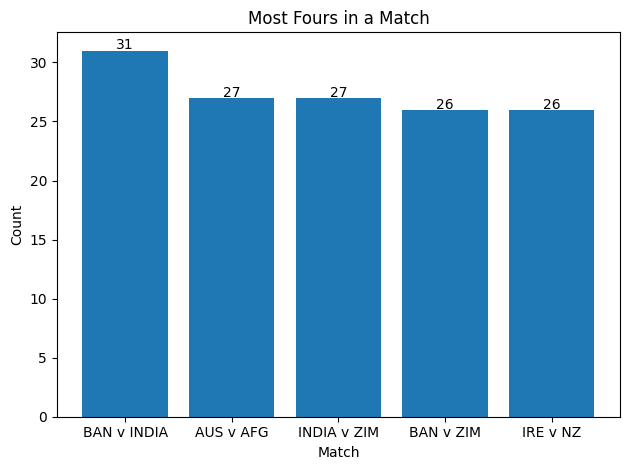

In [56]:
# most_fours_match = most_fours_match.head(5)

barplot(most_fours_match['Match'], most_fours_match['Fours'], 'Most Fours in a Match', 'Match', 'Count')

In [57]:
most_fours_innings_player = sup_12.most_fours_innings_player().head()
most_fours_innings_player

,match_name,Innings,Batsman,Fours
33,AUS v IRE,IRE,Lorcan Tucker,9
197,NZ v SL,NZ,Glenn Phillips,9
95,BAN v ZIM,ZIM,Sean Williams,8
191,NED v ZIM,NED,Max O'Dowd,8
64,BAN v INDIA,INDIA,Virat Kohli,8


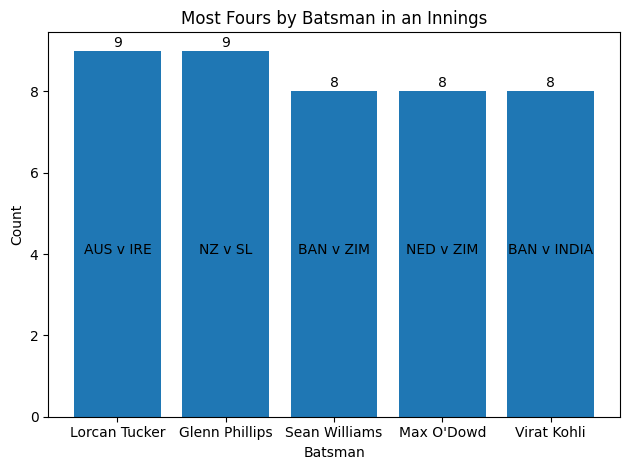

In [58]:
barplot(most_fours_innings_player['Batsman'], most_fours_innings_player['Fours'], 'Most Fours by Batsman in an Innings', 'Batsman', 'Count')
for i, v in zip(most_fours_innings_player['Batsman'], most_fours_innings_player['match_name']):
    plt.text(i, 4, str(v), ha = 'center');

In [59]:
most_fours_team_player = sup_12.most_fours_team_player().head()
most_fours_team_player

,Team,Batsman,Fours
4,INDIA,Virat Kohli,25
2,BAN,Taskin Ahmed,20
7,NZ,Kane Williamson,17
9,SA,Tristan Stubbs,15
3,ENG,Moeen Ali,14


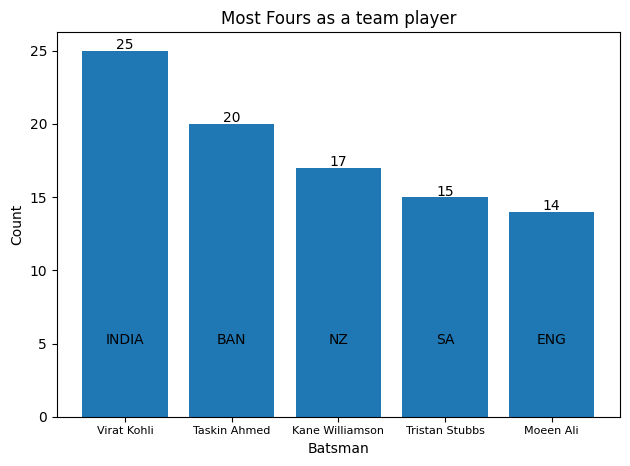

In [60]:
barplot(most_fours_team_player['Batsman'], most_fours_team_player['Fours'], 'Most Fours as a team player', 'Batsman', 'Count')
plt.xticks(fontsize = 8)
for i, v in zip(most_fours_team_player['Batsman'], most_fours_team_player['Team']):
    plt.text(i, 5, str(v), ha = 'center');

In [61]:
most_fours_match_player = sup_12.most_fours_match_player().head()
most_fours_match_player

,Match,Batsman,Fours
31,AUS v IRE,Lorcan Tucker,9
199,NZ v SL,Glenn Phillips,9
94,BAN v ZIM,Sean Williams,8
191,NED v ZIM,Max O'Dowd,8
64,BAN v INDIA,Virat Kohli,8


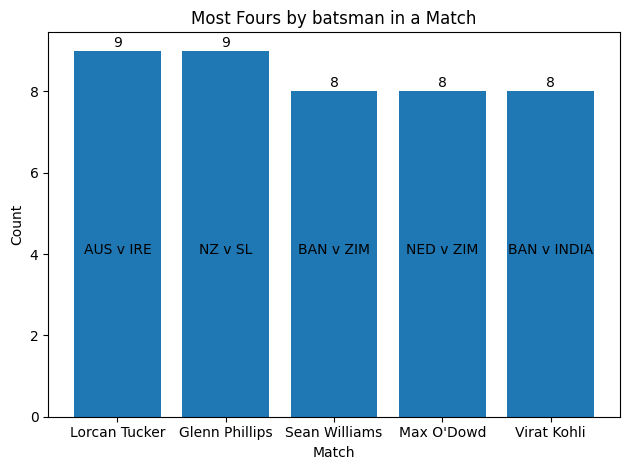

In [62]:
barplot(most_fours_match_player['Batsman'], most_fours_match_player['Fours'], 'Most Fours by batsman in a Match', 'Match', 'Count')
for i, v in zip(most_fours_match_player['Batsman'], most_fours_match_player['Match']):
    plt.text(i, 4, str(v), ha = 'center');

## Most Sixes

In [63]:
most_sixes_innings = sup_12.most_sixes_innings().head()
most_sixes_innings

,match_name,Innings,Sixes
19,BAN v SA,SA,10
10,AUS v SL,AUS,10
46,PAK v SA,PAK,9
4,AUS v AFG,AFG,8
9,AUS v NZ,NZ,8


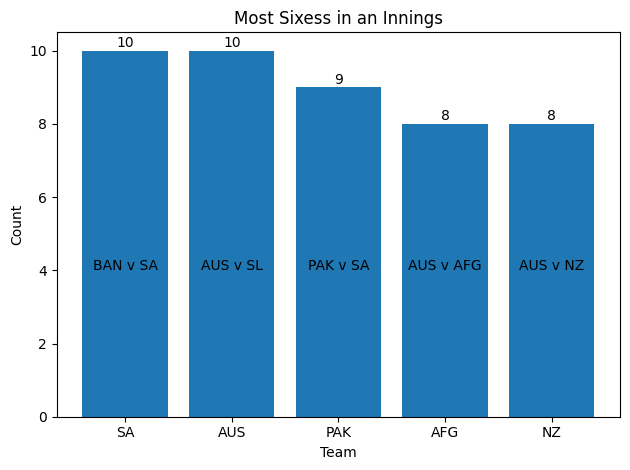

In [64]:
barplot(most_sixes_innings['Innings'], most_sixes_innings['Sixes'], 'Most Sixess in an Innings', 'Team', 'Count')
for i, v in zip(most_sixes_innings['Innings'], most_sixes_innings['match_name']):
    plt.text(i, 4, str(v), ha = 'center');

In [65]:
most_sixes_team = sup_12.most_sixes_team().head()
most_sixes_team

,Team,Sixes
1,AUS,28
4,INDIA,27
7,NZ,23
9,SA,22
8,PAK,21


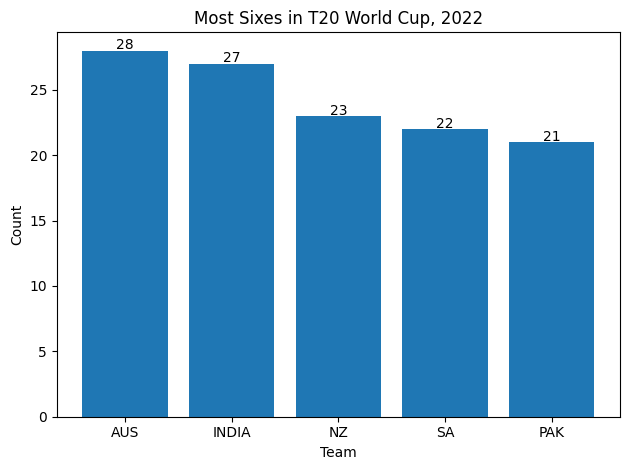

In [66]:
barplot(most_sixes_team['Team'], most_sixes_team['Sixes'], 'Most Sixes in T20 World Cup, 2022', 'Team', 'Count')

In [67]:
most_sixes_match = sup_12.most_sixes_match().head()
most_sixes_match

,Match,Sixes
2,AUS v AFG,14
9,BAN v SA,14
4,AUS v NZ,13
5,AUS v SL,12
6,BAN v INDIA,12


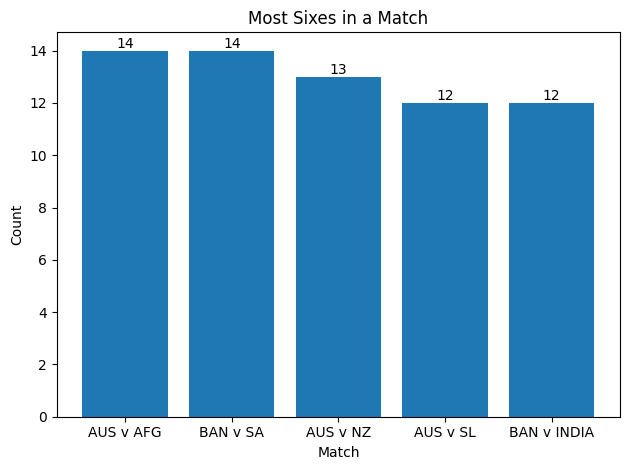

In [68]:
barplot(most_sixes_match['Match'], most_sixes_match['Sixes'], 'Most Sixes in a Match', 'Match', 'Count')

In [69]:
most_sixes_innings_player = sup_12.most_sixes_innings_player().head()
most_sixes_innings_player

,match_name,Innings,Batsman,Sixes
57,BAN v SA,SA,Rilee Rossouw,7
33,AUS v SL,AUS,Marcus Stoinis,6
77,ENG v SL,SL,Pathum Nissanka,5
118,NZ v SL,NZ,Glenn Phillips,4
85,INDIA v PAK,PAK,Iftikhar Ahmed,4


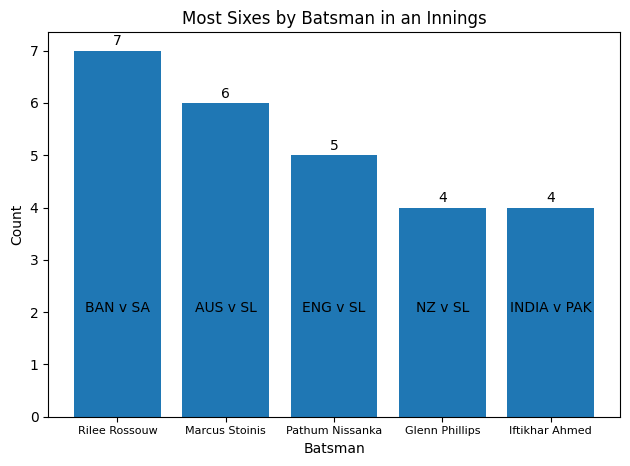

In [70]:
barplot(most_sixes_innings_player['Batsman'], most_sixes_innings_player['Sixes'], 'Most Sixes by Batsman in an Innings', 'Batsman', 'Count')
plt.xticks(fontsize = 8)
for i, v in zip(most_sixes_innings_player['Batsman'], most_sixes_innings_player['match_name']):
    plt.text(i, 2, str(v), ha = 'center');

In [71]:
most_sixes_team_player = sup_12.most_sixes_team_player().head()
most_sixes_team_player

,Team,Batsman,Sixes
1,AUS,Tim David,9
7,NZ,Mitchell Santner,8
9,SA,Tristan Stubbs,8
4,INDIA,Virat Kohli,7
5,IRE,Paul Stirling,6


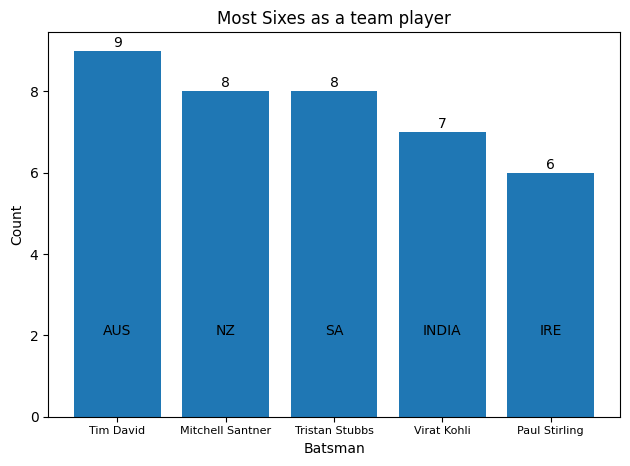

In [72]:
barplot(most_sixes_team_player['Batsman'], most_sixes_team_player['Sixes'], 'Most Sixes as a team player', 'Batsman', 'Count')
plt.xticks(fontsize = 8)
for i, v in zip(most_sixes_team_player['Batsman'], most_sixes_team_player['Team']):
    plt.text(i, 2, str(v), ha = 'center');

In [73]:
most_sixes_match_player = sup_12.most_sixes_match_player().head()
most_sixes_match_player

,Match,Batsman,Sixes
56,BAN v SA,Rilee Rossouw,7
34,AUS v SL,Marcus Stoinis,6
77,ENG v SL,Pathum Nissanka,5
84,INDIA v PAK,Iftikhar Ahmed,4
120,NZ v SL,Glenn Phillips,4


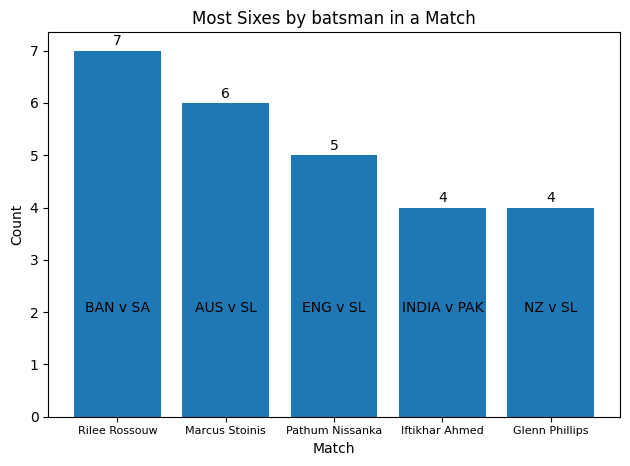

In [74]:
barplot(most_sixes_match_player['Batsman'], most_sixes_match_player['Sixes'], 'Most Sixes by batsman in a Match', 'Match', 'Count')
plt.xticks(fontsize = 8)
for i, v in zip(most_sixes_match_player['Batsman'], most_sixes_match_player['Match']):
    plt.text(i, 2, str(v), ha = 'center');

## Most Boundaries

In [75]:
most_boundaries_innings = sup_12.most_boundaries_innings().head()
most_boundaries_innings

,Innings,Fours,Sixes,Boundaries
1,AUS,16,10,26
9,SA,15,10,25
4,INDIA,18,6,24
7,NZ,16,8,24
8,PAK,13,9,22


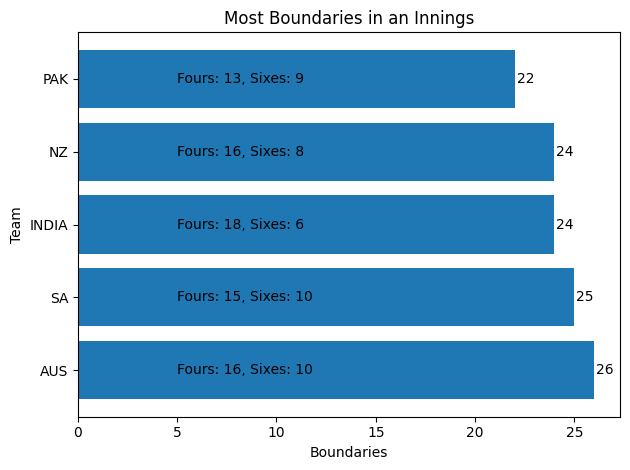

In [76]:
hbarplot(y = most_boundaries_innings['Innings'], width = most_boundaries_innings['Boundaries'], title = 'Most Boundaries in an Innings', xlabel = 'Boundaries', ylabel = 'Team')
string = [f'Fours: {f}, Sixes: {s}' for f, s in zip(most_boundaries_innings['Fours'], most_boundaries_innings['Sixes'])]

for i, v in zip(most_boundaries_innings['Innings'], string):
    plt.text(5, i, str(v), va = 'center')

In [77]:
most_boundaries_team = sup_12.most_boundaries_team().head()
most_boundaries_team

,Team,Fours,Sixes,Boundaries
0,INDIA,66,27,93
2,SA,54,22,76
3,PAK,51,21,72
6,NZ,49,23,72
9,AUS,42,28,70


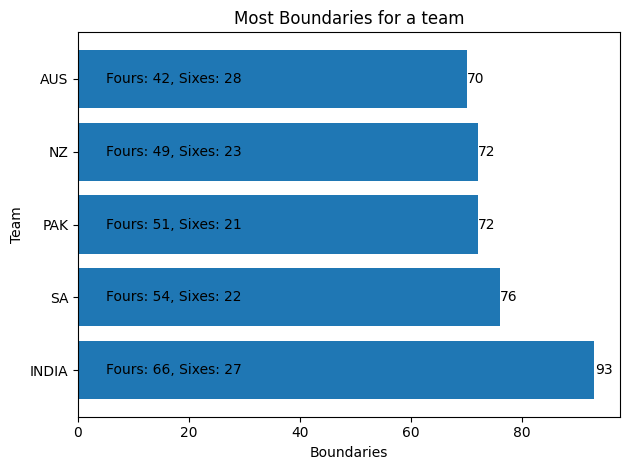

In [78]:
hbarplot(y = most_boundaries_team['Team'], width = most_boundaries_team['Boundaries'], title = 'Most Boundaries for a team', xlabel = 'Boundaries', ylabel = 'Team')
string = [f'Fours: {f}, Sixes: {s}' for f, s in zip(most_boundaries_team['Fours'], most_boundaries_team['Sixes'])]

for i, v in zip(most_boundaries_team['Team'], string):
    plt.text(5, i, str(v), va = 'center')

In [79]:
most_boundaries_match = sup_12.most_boundaries_match().head()
most_boundaries_match

,Match,Fours,Sixes,Boundaries
0,BAN v INDIA,31,12.0,43.0
1,AUS v AFG,27,14.0,41.0
5,PAK v SA,25,12.0,37.0
8,AUS v NZ,24,13.0,37.0
4,IRE v NZ,26,10.0,36.0


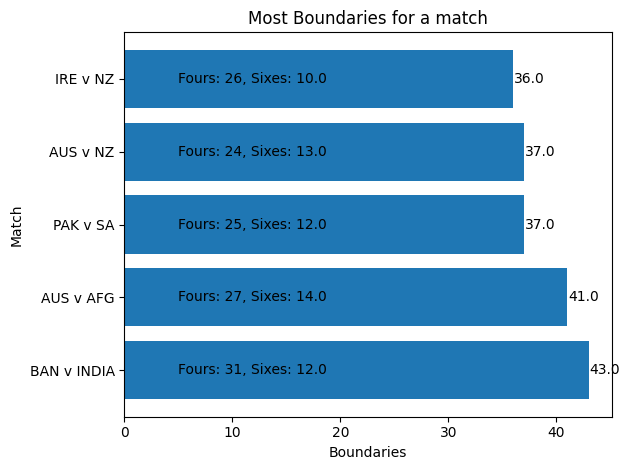

In [80]:
hbarplot(y = most_boundaries_match['Match'], width = most_boundaries_match['Boundaries'], title = 'Most Boundaries for a match', xlabel = 'Boundaries', ylabel = 'Match')
string = [f'Fours: {f}, Sixes: {s}' for f, s in zip(most_boundaries_match['Fours'], most_boundaries_match['Sixes'])]

for i, v in zip(most_boundaries_match['Match'], string):
    plt.text(5, i, str(v), va = 'center')

## Most single and doubles

In [81]:
most_single_innings = sup_12.most_single_innings().head()
most_single_innings

,Match,Innings,Single
38,IRE v SL,IRE,64
20,BAN v ZIM,BAN,59
27,ENG v SL,SL,56
43,NED v SA,SA,53
9,AUS v NZ,NZ,53


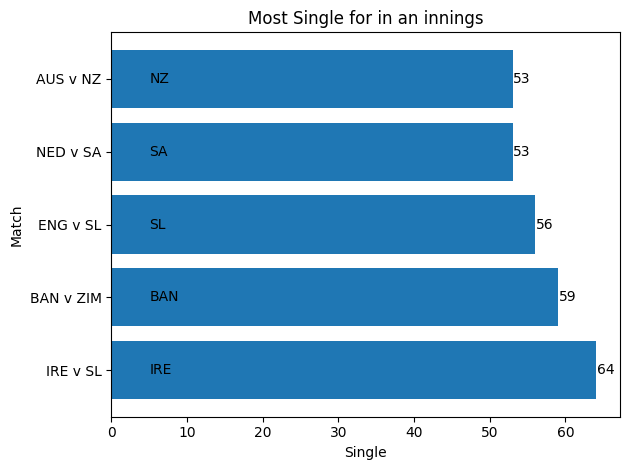

In [82]:
hbarplot(y = most_single_innings['Match'], width = most_single_innings['Single'], title = 'Most Single for in an innings', xlabel = 'Single', ylabel = 'Match')

for i, v in zip(most_single_innings['Match'], most_single_innings['Innings']):
    plt.text(5, i, str(v), va = 'center')

In [83]:
most_single_team = sup_12.most_single_team().head()
most_single_team

,Team,Single
4,INDIA,230
2,BAN,228
10,SL,210
6,NED,195
7,NZ,195


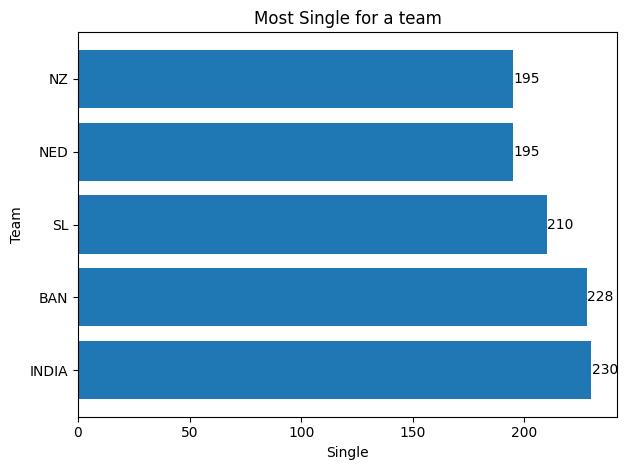

In [84]:
hbarplot(y = most_single_team['Team'], width = most_single_team['Single'], title = 'Most Single for a team', xlabel = 'Single', ylabel = 'Team')

In [85]:
most_single_match = sup_12.most_single_match().head()
most_single_match

,Match,Single
10,BAN v ZIM,104
19,IRE v SL,102
13,ENG v SL,101
21,NED v SA,94
25,PAK v ZIM,93


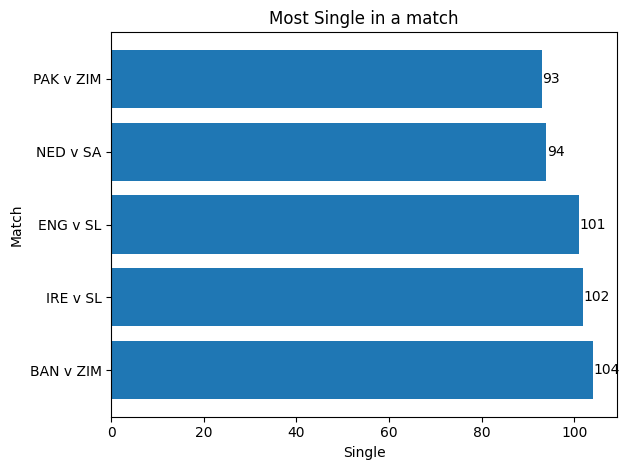

In [86]:
hbarplot(y = most_single_match['Match'], width = most_single_match['Single'], title = 'Most Single in a match', xlabel = 'Single', ylabel = 'Match')

### Double and tripples

In [87]:
most_double_innings = sup_12.most_double_innings().head()
most_double_innings

,Match,Innings,Runs
25,ENG v NZ,NZ,45
24,ENG v NZ,ENG,38
29,INDIA v NED,NED,36
30,INDIA v PAK,INDIA,35
36,IRE v NZ,IRE,35


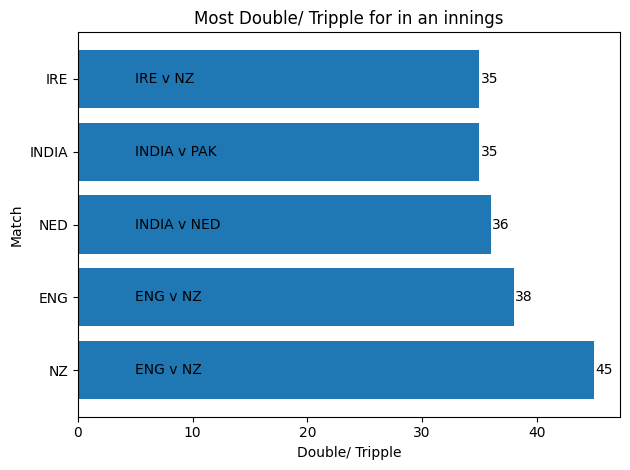

In [88]:
hbarplot(y = most_double_innings['Innings'], width = most_double_innings['Runs'], title = 'Most Double/ Tripple for in an innings', xlabel = 'Double/ Tripple', ylabel = 'Match')

for i, v in zip(most_double_innings['Innings'], most_double_innings['Match']):
    plt.text(5, i, str(v), va = 'center')

In [89]:
most_double_team = sup_12.most_double_team().head()
most_double_team

,Team,Runs
8,PAK,142
7,NZ,137
4,INDIA,136
3,ENG,127
10,SL,118


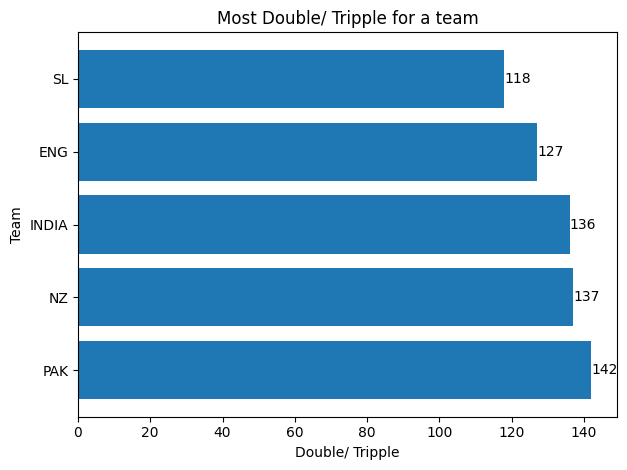

In [90]:
hbarplot(y = most_double_team['Team'], width = most_double_team['Runs'], title = 'Most Double/ Tripple for a team', xlabel = 'Double/ Tripple', ylabel = 'Team')

In [91]:
most_double_match = sup_12.most_double_match().head()
most_double_match

,Match,Runs
12,ENG v NZ,83
15,INDIA v PAK,69
14,INDIA v NED,66
18,IRE v NZ,64
11,ENG v IRE,55


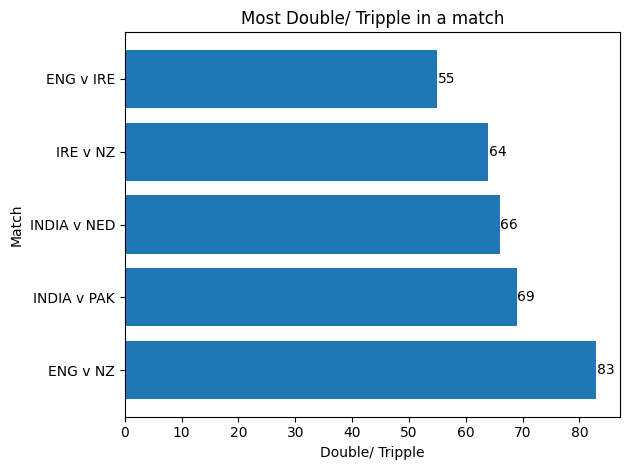

In [92]:
hbarplot(y = most_double_match['Match'], width = most_double_match['Runs'], title = 'Most Double/ Tripple in a match', xlabel = 'Double/ Tripple', ylabel = 'Match')

## Powerplay Analysis

In [93]:
most_run_power_team = sup_12.most_run_power_team().head()
most_run_power_team

,Team,Runs
2,BAN,226
9,SA,225
3,ENG,195
10,SL,192
5,IRE,187


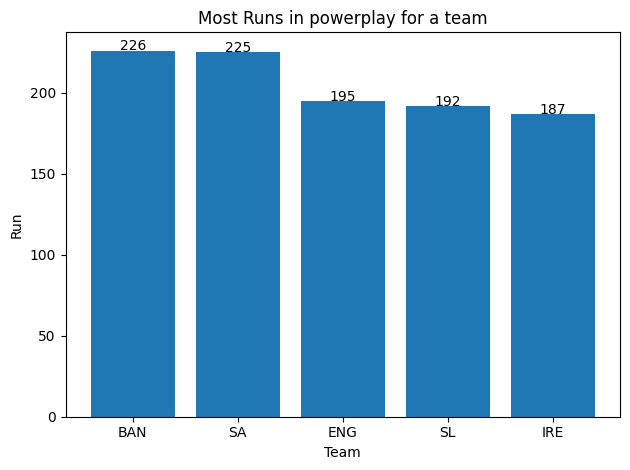

In [94]:
barplot(most_run_power_team['Team'], most_run_power_team['Runs'], 'Most Runs in powerplay for a team', 'Team', 'Run')


In [95]:
most_run_power_innings_team = sup_12.most_run_power_innings_team().head()
most_run_power_innings_team

,Match,Team,Runs
26,ENG v SL,ENG,70
9,AUS v NZ,NZ,65
19,BAN v SA,SA,63
12,BAN v INDIA,BAN,60
23,ENG v IRE,IRE,59


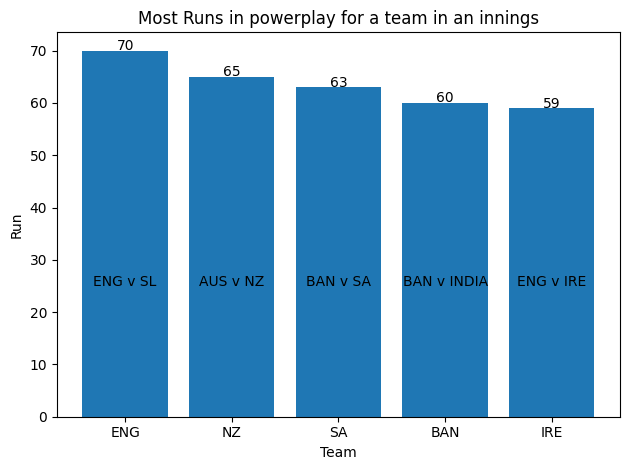

In [96]:
barplot(most_run_power_innings_team['Team'], most_run_power_innings_team['Runs'], 'Most Runs in powerplay for a team in an innings', 'Team', 'Run')
for i, v in zip(most_run_power_innings_team['Team'], most_run_power_innings_team['Match']):
    plt.text(i, 25, str(v), ha = 'center');

In [97]:
most_run_power_player = sup_12.most_run_power_player().head()
most_run_power_player

,Batsman,Runs
3,Alex Hales,101
38,Litton Das,97
23,Finn Allen,91
50,Quinton de Kock,84
47,Najmul Hossain Shanto,77


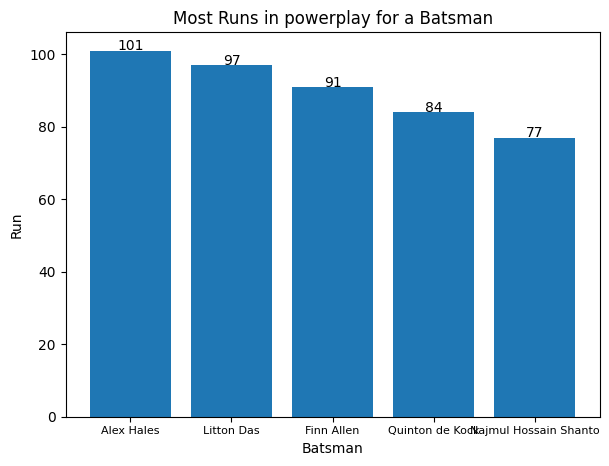

In [98]:
barplot(most_run_power_player['Batsman'], most_run_power_player['Runs'], 'Most Runs in powerplay for a Batsman', 'Batsman', 'Run')
plt.xticks(fontsize = 8);

In [99]:
most_run_power_match_player = sup_12.most_run_power_match_player().head()
most_run_power_match_player

,Match,Batsman,Runs
44,BAN v INDIA,Litton Das,56
190,SA v ZIM,Quinton de Kock,47
94,ENG v SL,Alex Hales,42
32,AUS v NZ,Finn Allen,42
88,ENG v NZ,Alex Hales,37


In [100]:
most_strike_power_team = sup_12.most_strike_power_team().head()
most_strike_power_team

,Team,Runs,Strk Rate
2,BAN,226,627.78
9,SA,225,625.00
3,ENG,195,541.67
10,SL,192,533.33
5,IRE,187,519.44


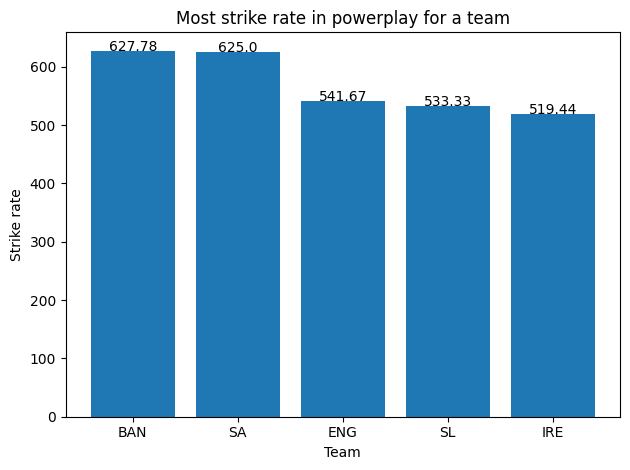

In [101]:
barplot(most_strike_power_team['Team'], most_strike_power_team['Strk Rate'], 'Most strike rate in powerplay for a team', 'Team', 'Strike rate');

In [102]:
most_strike_power_innings_team = sup_12.most_strike_power_innings_team().head()
most_strike_power_innings_team

,Match,Team,Runs,Strk Rate
26,ENG v SL,ENG,70,194.44
9,AUS v NZ,NZ,65,180.56
19,BAN v SA,SA,63,175.00
12,BAN v INDIA,BAN,60,166.67
23,ENG v IRE,IRE,59,163.89


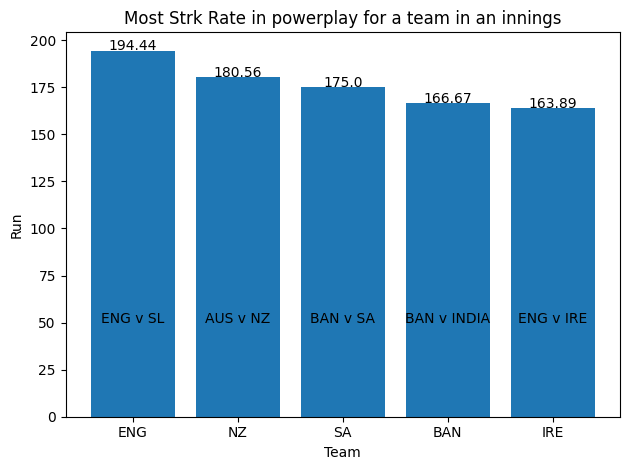

In [103]:
barplot(most_strike_power_innings_team['Team'], most_strike_power_innings_team['Strk Rate'], 'Most Strk Rate in powerplay for a team in an innings', 'Team', 'Run')
for i, v in zip(most_strike_power_innings_team['Team'], most_strike_power_innings_team['Match']):
    plt.text(i, 50, str(v), ha = 'center');

In [104]:
most_strike_power_player = sup_12.most_strike_power_player().head()
most_strike_power_player

,Batsman,Runs,Strk Rate
3,Alex Hales,101,280.56
38,Litton Das,97,269.44
23,Finn Allen,91,252.78
50,Quinton de Kock,84,233.33
47,Najmul Hossain Shanto,77,213.89


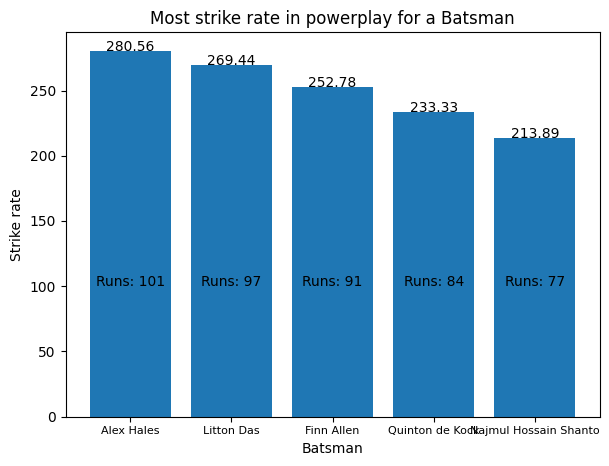

In [105]:
barplot(most_strike_power_player['Batsman'], most_strike_power_player['Strk Rate'], 'Most strike rate in powerplay for a Batsman', 'Batsman', 'Strike rate')
plt.xticks(fontsize = 8)
for i, v in zip(most_strike_power_player['Batsman'], most_strike_power_player['Runs']):
    plt.text(i, 100, f'Runs: {str(v)}', ha = 'center');

In [106]:
most_strike_power_match_player = sup_12.most_strike_power_match_player()
most_strike_power_match_player = most_strike_power_match_player[most_strike_power_match_player['Runs'] >= 25].head()
most_strike_power_match_player

,Match,Batsman,Runs,Strk Rate
44,BAN v INDIA,Litton Das,56,155.56
190,SA v ZIM,Quinton de Kock,47,130.56
94,ENG v SL,Alex Hales,42,116.67
32,AUS v NZ,Finn Allen,42,116.67
88,ENG v NZ,Alex Hales,37,102.78


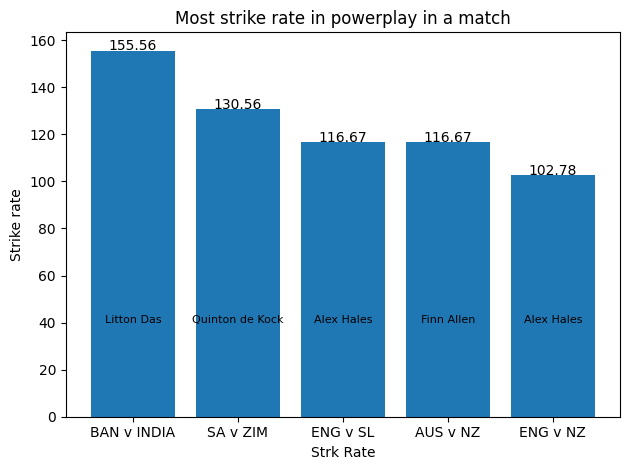

In [107]:
barplot(most_strike_power_match_player['Match'], most_strike_power_match_player['Strk Rate'], 'Most strike rate in powerplay in a match', 'Strk Rate', 'Strike rate')
# plt.xticks(fontsize = 8)
for i, v in zip(most_strike_power_match_player['Match'], most_strike_power_match_player['Batsman']):
    plt.text(i, 40, str(v), ha = 'center', fontdict={'size': 8});

In [108]:
most_wicket_power_innings_bowler = sup_12.most_wicket_power_innings_bowler().head()
most_wicket_power_innings_bowler

,Match,Innings,Bowler,Wicket
20,BAN v SA,BAN,Anrich Nortje,3
58,NZ v SL,SL,Trent Boult,3
62,PAK v SA,SA,Shaheen Shah Afridi,2
24,BAN v ZIM,ZIM,Mustafizur Rahman,2
23,BAN v ZIM,BAN,Blessing Muzarabani,2


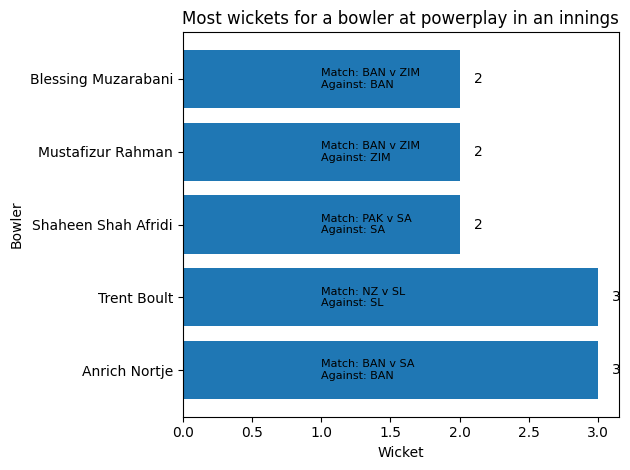

In [109]:
hbarplot(y = most_wicket_power_innings_bowler['Bowler'], width = most_wicket_power_innings_bowler['Wicket'], title = 'Most wickets for a bowler at powerplay in an innings', xlabel = 'Wicket', ylabel = 'Bowler')
string = [f'Match: {m}\nAgainst: {i}' for m, i in zip(most_wicket_power_innings_bowler['Match'], most_wicket_power_innings_bowler['Innings'])]

for i, v in zip(most_wicket_power_innings_bowler['Bowler'], string):
    plt.text(1, i, str(v), va = 'center', fontdict={'size': 8})

In [110]:
most_wicket_power_match_bowler = sup_12.most_wicket_power_match_bowler().head()
most_wicket_power_match_bowler

,Match,Bowler,Wicket
20,BAN v SA,Anrich Nortje,3
58,NZ v SL,Trent Boult,3
9,AUS v IRE,Mitchell Starc,2
25,BAN v ZIM,Taskin Ahmed,2
67,SA v ZIM,Lungi Ngidi,2


In [111]:
most_wicket_power_bowler = sup_12.most_wicket_power_bowler().head()
most_wicket_power_bowler

,Bowler,Wicket
22,Lungi Ngidi,5
1,Arshdeep Singh,5
38,Taskin Ahmed,5
5,Blessing Muzarabani,5
37,Shaheen Shah Afridi,4


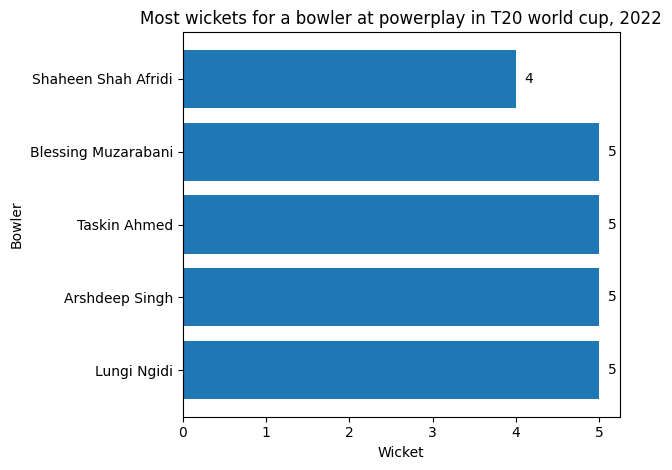

In [112]:
hbarplot(y = most_wicket_power_bowler['Bowler'], width = most_wicket_power_bowler['Wicket'], title = 'Most wickets for a bowler at powerplay in T20 world cup, 2022', xlabel = 'Wicket', ylabel = 'Bowler');

In [113]:
lowest_economy_power_bowler = sup_12.lowest_economy_power_bowler()
lowest_economy_power_bowler = lowest_economy_power_bowler[lowest_economy_power_bowler['Over'] >= 8].head()
lowest_economy_power_bowler

,Bowler,Over,Wickets,Economy
8,Bhuvneshwar Kumar,14.0,2,4.57
55,Shaheen Shah Afridi,9.0,4,5.11
62,Tim Southee,8.0,3,5.12
65,Wayne Parnell,10.0,2,5.20
47,Naseem Shah,10.0,1,5.30


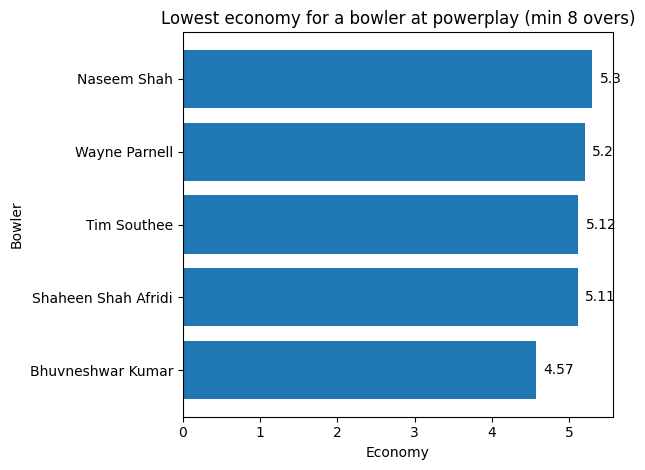

In [114]:
hbarplot(y = lowest_economy_power_bowler['Bowler'], width = lowest_economy_power_bowler['Economy'], title = 'Lowest economy for a bowler at powerplay (min 8 overs)', xlabel = 'Economy', ylabel = 'Bowler')

In [115]:
lowest_average_power_bowler = sup_12.lowest_average_power_bowler()
lowest_average_power_bowler = lowest_average_power_bowler[lowest_average_power_bowler['Over'] >= 8].head()
lowest_average_power_bowler

,Bowler,Over,Wickets,Average
2,Arshdeep Singh,8.0,5,10.00
10,Blessing Muzarabani,8.0,5,10.20
55,Shaheen Shah Afridi,9.0,4,11.50
59,Taskin Ahmed,12.0,5,12.80
62,Tim Southee,8.0,3,13.67


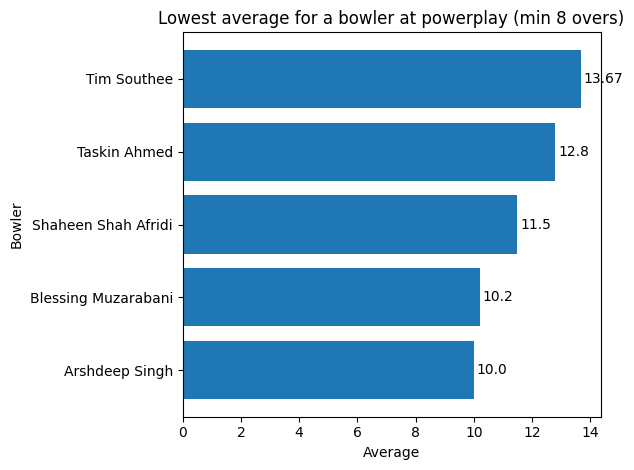

In [116]:
hbarplot(y = lowest_average_power_bowler['Bowler'], width = lowest_average_power_bowler['Average'], title = 'Lowest average for a bowler at powerplay (min 8 overs)', xlabel = 'Average', ylabel = 'Bowler')

In [117]:
most_out_power_batsman = sup_12.most_out_power_batsman().head()
most_out_power_batsman

,Batsman,Out
41,Wessly Madhevere,4
8,Craig Ervine,4
12,Finn Allen,4
10,David Warner,4
31,Rohit Sharma,4


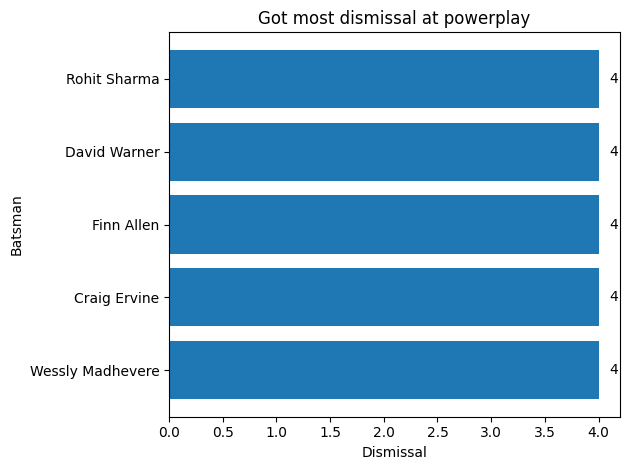

In [118]:
hbarplot(y = most_out_power_batsman['Batsman'], width = most_out_power_batsman['Out'], title = 'Got most dismissal at powerplay', xlabel = 'Dismissal', ylabel = 'Batsman')

## Death over analysis

In [119]:
most_run_death_team = sup_12.most_run_death_team().head()
most_run_death_team

,Team,Runs
4,INDIA,284
7,NZ,205
8,PAK,186
6,NED,171
5,IRE,136


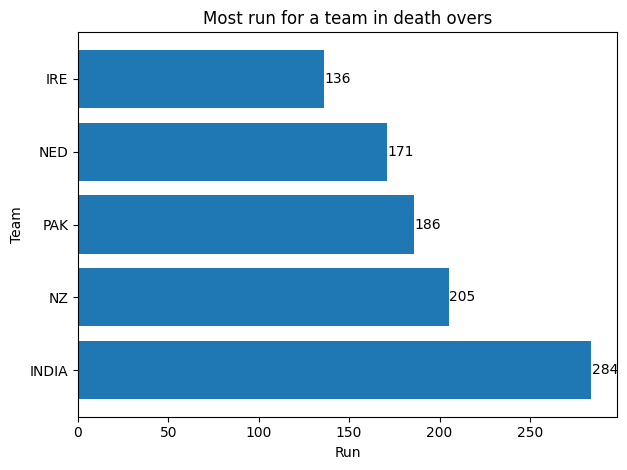

In [120]:
hbarplot(y = most_run_death_team['Team'], width = most_run_death_team['Runs'], title = 'Most run for a team in death overs', xlabel = 'Run', ylabel = 'Team')

In [121]:
most_run_death_innings_team = sup_12.most_run_death_innings_team().head()
most_run_death_innings_team

,Match,Team,Runs
33,INDIA v ZIM,INDIA,73
27,INDIA v NED,INDIA,65
45,PAK v SA,PAK,65
29,INDIA v PAK,INDIA,60
43,NZ v SL,NZ,60


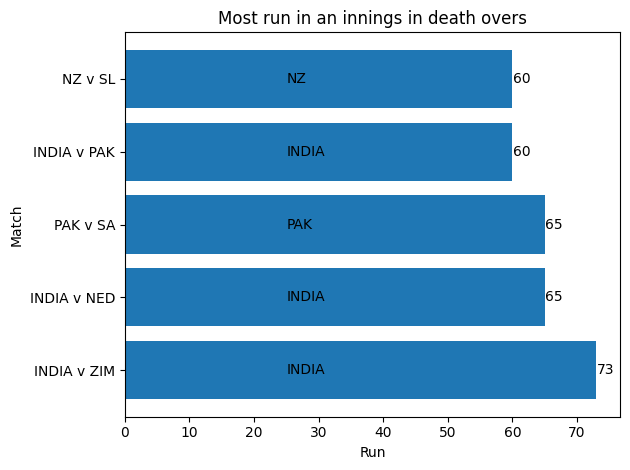

In [122]:
hbarplot(y = most_run_death_innings_team['Match'], width = most_run_death_innings_team['Runs'], title = 'Most run in an innings in death overs', xlabel = 'Run', ylabel = 'Match')
for i, v in zip(most_run_death_innings_team['Match'], most_run_death_innings_team['Team']):
    plt.text(25, i, str(v), va = 'center')

In [123]:
most_run_death_player = sup_12.most_run_death_player().head()
most_run_death_player

,Batsman,Runs
98,Suryakumar Yadav,104
106,Virat Kohli,103
36,Glenn Phillips,54
83,Rashid Khan,54
82,Paul van Meekeren,48


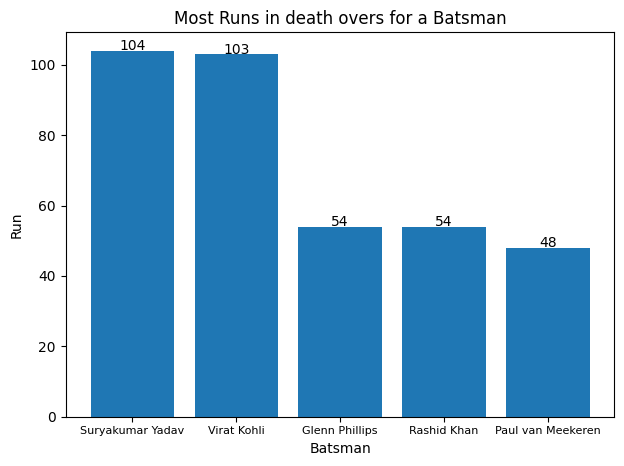

In [124]:
barplot(most_run_death_player['Batsman'], most_run_death_player['Runs'], 'Most Runs in death overs for a Batsman', 'Batsman', 'Run')
plt.xticks(fontsize = 8);

In [125]:
most_run_death_match_player = sup_12.most_run_death_match_player().head()
most_run_death_match_player

,Match,Batsman,Runs
146,INDIA v ZIM,Suryakumar Yadav,53
131,INDIA v PAK,Virat Kohli,46
25,AUS v AFG,Rashid Khan,45
190,NZ v SL,Glenn Phillips,42
199,PAK v SA,Shadab Khan,38


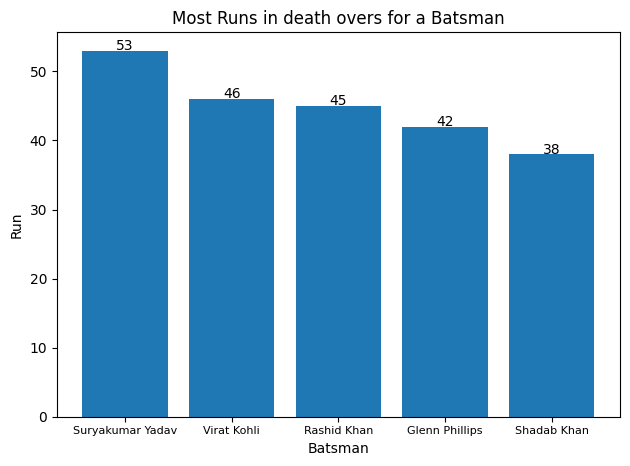

In [126]:
barplot(most_run_death_match_player['Batsman'], most_run_death_match_player['Runs'], 'Most Runs in death overs for a Batsman', 'Batsman', 'Run')
plt.xticks(fontsize = 8);

In [127]:
most_strike_death_team = sup_12.most_strike_death_team().head()
most_strike_death_team

,Team,Runs,Strk Rate
4,INDIA,284,178.62
8,PAK,186,161.74
7,NZ,205,161.42
1,AUS,108,138.46
0,AFG,120,134.83


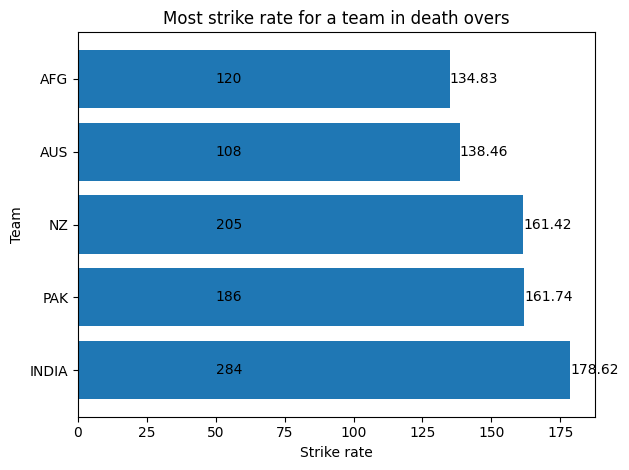

In [128]:
hbarplot(y = most_strike_death_team['Team'], width = most_strike_death_team['Strk Rate'], title = 'Most strike rate for a team in death overs', xlabel = 'Strike rate', ylabel = 'Team')
for i, v in zip(most_strike_death_team['Team'], most_strike_death_team['Runs']):
    plt.text(50, i, str(v), va = 'center')

In [129]:
most_strike_death_innings_team = sup_12.most_strike_death_innings_team()
most_strike_death_innings_team = most_strike_death_innings_team[most_strike_death_innings_team['Runs'] >= 30].head()
most_strike_death_innings_team

,Match,Team,Runs,Strk Rate
10,AUS v SL,AUS,32,290.91
33,INDIA v ZIM,INDIA,73,235.48
27,INDIA v NED,INDIA,65,209.68
45,PAK v SA,PAK,65,203.12
43,NZ v SL,NZ,60,187.50


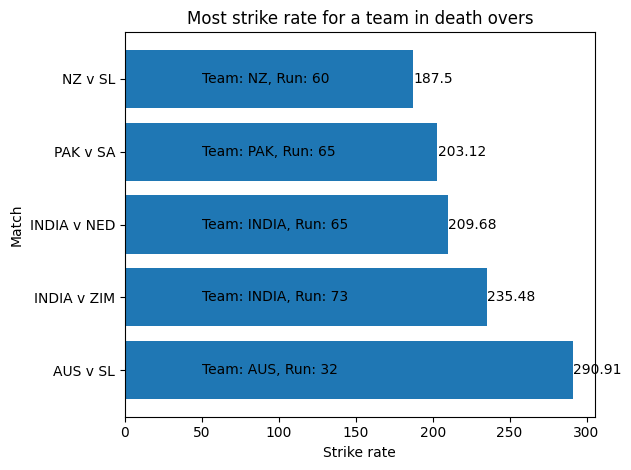

In [130]:
hbarplot(y = most_strike_death_innings_team['Match'], width = most_strike_death_innings_team['Strk Rate'], title = 'Most strike rate for a team in death overs', xlabel = 'Strike rate', ylabel = 'Match')
string = [f'Team: {t}, Run: {r}' for t, r in zip(most_strike_death_innings_team['Team'], most_strike_death_innings_team['Runs'])]
for i, v in zip(most_strike_death_innings_team['Match'], string):
    plt.text(50, i, str(v), va = 'center')

In [131]:
most_strike_death_player = sup_12.most_strike_death_player()
most_strike_death_player = most_strike_death_player[most_strike_death_player['Runs'] >= 20].head()
most_strike_death_player

,Batsman,Runs,Strk Rate
92,Shadab Khan,38,271.43
52,Kane Williamson,31,258.33
58,Lorcan Tucker,29,241.67
98,Suryakumar Yadav,104,236.36
106,Virat Kohli,103,219.15


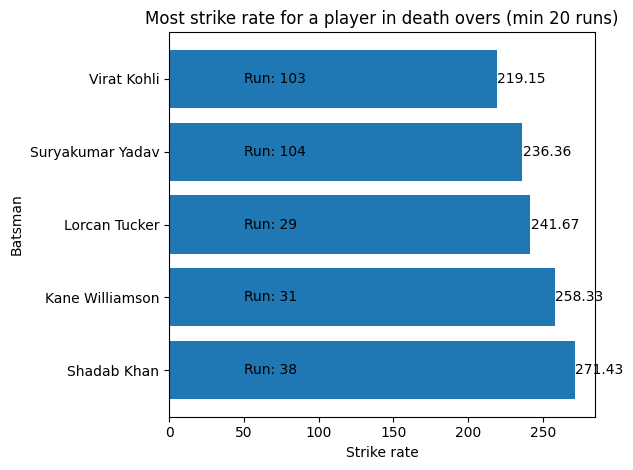

In [132]:
hbarplot(y = most_strike_death_player['Batsman'], width = most_strike_death_player['Strk Rate'], title = 'Most strike rate for a player in death overs (min 20 runs)', xlabel = 'Strike rate', ylabel = 'Batsman')
for i, v in zip(most_strike_death_player['Batsman'], most_strike_death_player['Runs']):
    plt.text(50, i, f'Run: {str(v)}', va = 'center');

In [133]:
most_strike_death_match_player = sup_12.most_strike_death_match_player()
most_strike_death_match_player = most_strike_death_match_player[most_strike_death_match_player['Runs'] >= 10].head()
most_strike_death_match_player

,Match,Batsman,Runs,Strk Rate
44,AUS v SL,Marcus Stoinis,28,121.74
82,BAN v ZIM,Najmul Hossain Shanto,18,90.00
84,BAN v ZIM,Richard Ngarava,10,83.33
57,BAN v NED,Mosaddek Hossain,22,81.48
50,BAN v INDIA,Ravichandran Ashwin,13,81.25


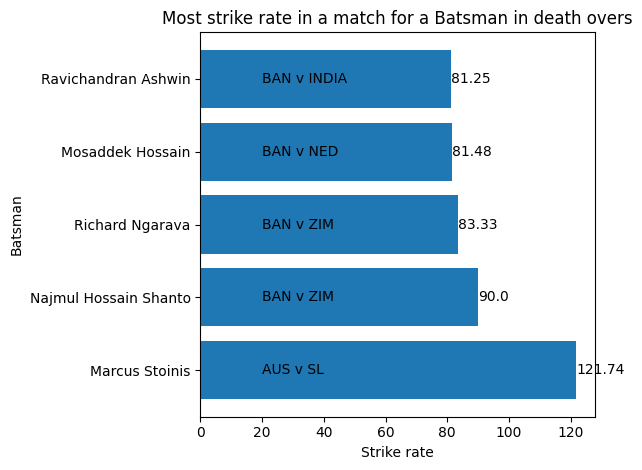

In [134]:
hbarplot(y = most_strike_death_match_player['Batsman'], width = most_strike_death_match_player['Strk Rate'], title = 'Most strike rate in a match for a Batsman in death overs', xlabel = 'Strike rate', ylabel = 'Batsman')
for i, v in zip(most_strike_death_match_player['Batsman'], most_strike_death_match_player['Match']):
    plt.text(20, i, str(v), va = 'center')

In [135]:
most_wicket_death_innings_bowler = sup_12.most_wicket_death_innings_bowler().head()
most_wicket_death_innings_bowler

,Match,Innings,Bowler,Wicket
2,AFG v ENG,AFG,Sam Curran,4
25,BAN v PAK,BAN,Shaheen Shah Afridi,3
53,INDIA v SA,INDIA,Wayne Parnell,3
45,ENG v SL,SL,Mark Wood,3
62,IRE v NZ,NZ,Josh Little,3


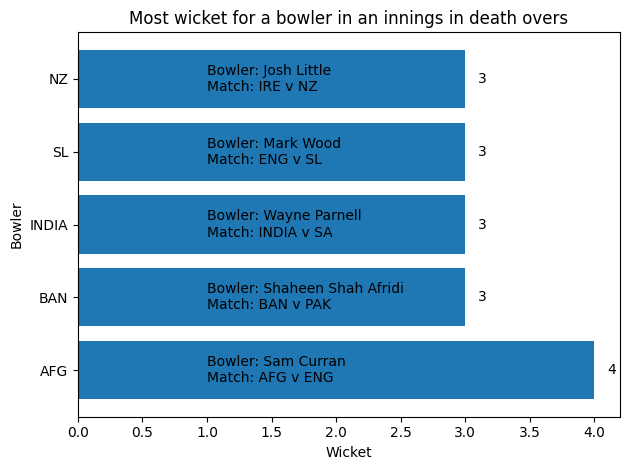

In [136]:
hbarplot(y = most_wicket_death_innings_bowler['Innings'], width = most_wicket_death_innings_bowler['Wicket'], title = 'Most wicket for a bowler in an innings in death overs', xlabel = 'Wicket', ylabel = 'Bowler')
string = [f'Bowler: {b}\nMatch: {m}' for b, m in zip(most_wicket_death_innings_bowler['Bowler'], most_wicket_death_innings_bowler['Match'])]
for i, v in zip(most_wicket_death_innings_bowler['Innings'], string):
    plt.text(1, i, str(v), va = 'center')

In [137]:
most_wicket_death_match_bowler = sup_12.most_wicket_death_match_bowler().head()
most_wicket_death_match_bowler

,Match,Bowler,Wicket
0,AFG v ENG,Sam Curran,4
18,IRE v NZ,Tim Southee,3
16,INDIA v SA,Wayne Parnell,3
11,ENG v IRE,Sam Curran,3
13,ENG v SL,Mark Wood,3


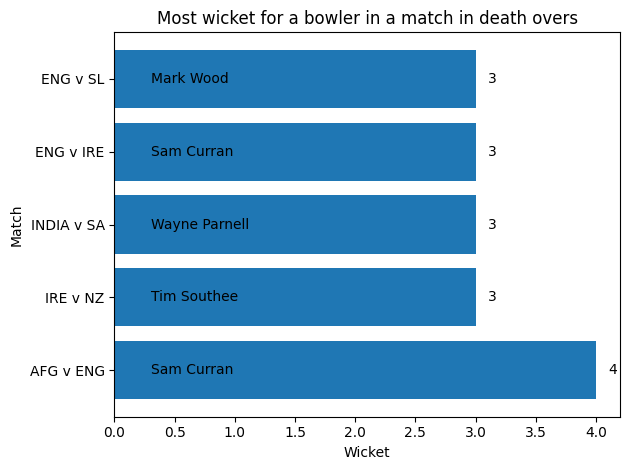

In [138]:
hbarplot(y = most_wicket_death_match_bowler['Match'], width = most_wicket_death_match_bowler['Wicket'], title = 'Most wicket for a bowler in a match in death overs', xlabel = 'Wicket', ylabel = 'Match')
for i, v in zip(most_wicket_death_match_bowler['Match'], most_wicket_death_match_bowler['Bowler']):
    plt.text(0.3, i, str(v), va = 'center')

In [139]:
most_wicket_death_bowler = sup_12.most_wicket_death_bowler().head()
most_wicket_death_bowler

,Bowler,Wicket
44,Sam Curran,7
30,Mark Wood,6
5,Bas de Leede,5
43,Richard Ngarava,4
22,Josh Little,4


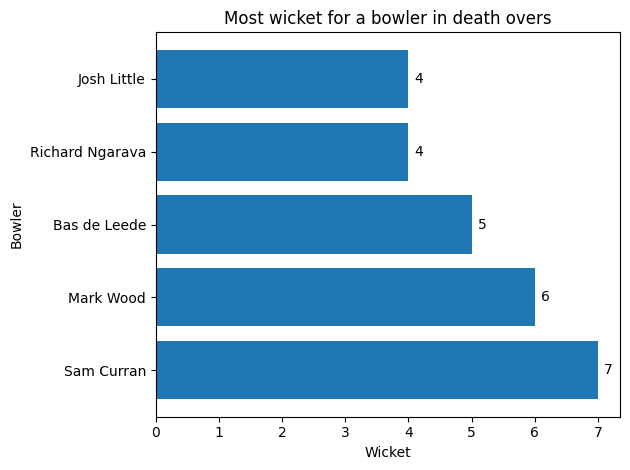

In [140]:
hbarplot(y = most_wicket_death_bowler['Bowler'], width = most_wicket_death_bowler['Wicket'], title = 'Most wicket for a bowler in death overs', xlabel = 'Wicket', ylabel = 'Bowler')

In [141]:
lowest_economy_death_bowler = sup_12.lowest_economy_death_bowler()
lowest_economy_death_bowler = lowest_economy_death_bowler[lowest_economy_death_bowler['Over'] >= 8].head()
lowest_economy_death_bowler

,Bowler,Over,Wickets,Economy
8,Bhuvneshwar Kumar,9.9,3,5.25
22,Haris Rauf,15.0,5,5.27
44,Mohammed Shami,12.0,3,5.42
1,Anrich Nortje,15.3,10,5.49
48,Naseem Shah,15.0,2,5.53


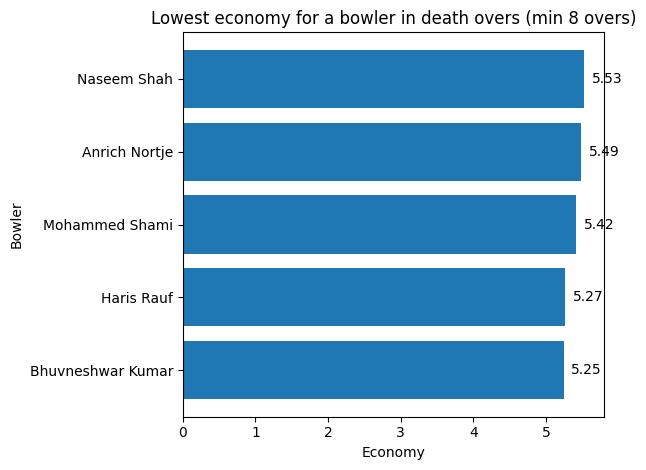

In [142]:
hbarplot(y = lowest_economy_death_bowler['Bowler'], width = lowest_economy_death_bowler['Economy'], title = 'Lowest economy for a bowler in death overs (min 8 overs)', xlabel = 'Economy', ylabel = 'Bowler')

In [143]:
lowest_average_death_bowler = sup_12.lowest_average_death_bowler()
lowest_average_death_bowler = lowest_average_death_bowler[lowest_average_death_bowler['Over'] >= 8].head()
lowest_average_death_bowler

,Bowler,Over,Wickets,Average
1,Anrich Nortje,15.3,10,8.4
55,Sam Curran,14.4,10,9.4
63,Taskin Ahmed,11.0,7,10.0
39,Mark Wood,14.0,9,12.0
21,Hardik Pandya,11.0,6,12.5


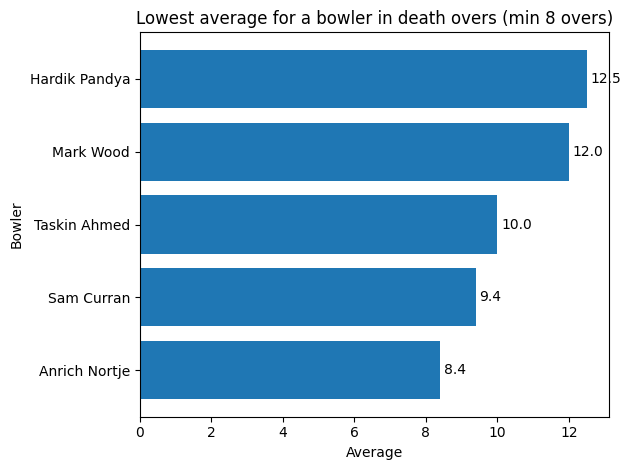

In [144]:
hbarplot(y = lowest_average_death_bowler['Bowler'], width = lowest_average_death_bowler['Average'], title = 'Lowest average for a bowler in death overs (min 8 overs)', xlabel = 'Average', ylabel = 'Bowler')

In [145]:
most_out_death_batsman = sup_12.most_out_death_batsman().head()
most_out_death_batsman

,Batsman,Out
63,Scott Edwards,3
70,Taskin Ahmed,3
18,Dasun Shanaka,3
25,George Dockrell,3
41,Mark Adair,3


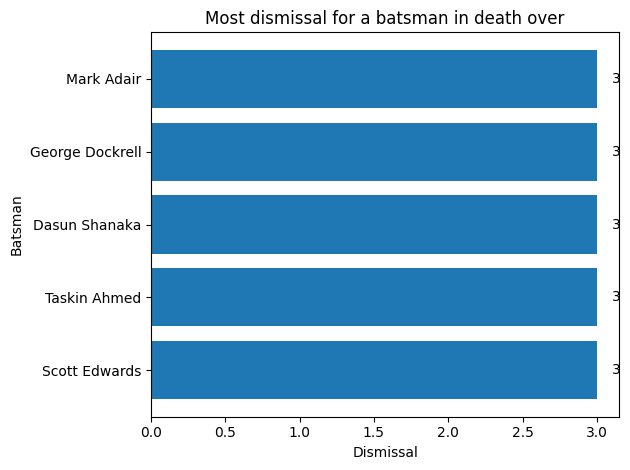

In [146]:
hbarplot(y = most_out_death_batsman['Batsman'], width = most_out_death_batsman['Out'], title = 'Most dismissal for a batsman in death over', xlabel = 'Dismissal', ylabel = 'Batsman')